In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').show();
 } else {
 $('div.input').hide();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import subprocess
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import itertools
from susipop import filter
from susipop import reader
from IPython.html.widgets import FloatProgress
from IPython.display import display
from ipywidgets import interactive
import ipywidgets as widgets
%matplotlib notebook

import plotly
import susipop as sp

from multiprocessing import Pool

/home/vsivadas/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/vsivadas/.local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
def get_folder_list():
    f = next(os.walk('.'))[1]
    return f

# Cluster Analysis in SuSi

There are some important functions in susi for cluster analysis. 

## Radial Distribution function 

<IPython.core.display.Javascript object>


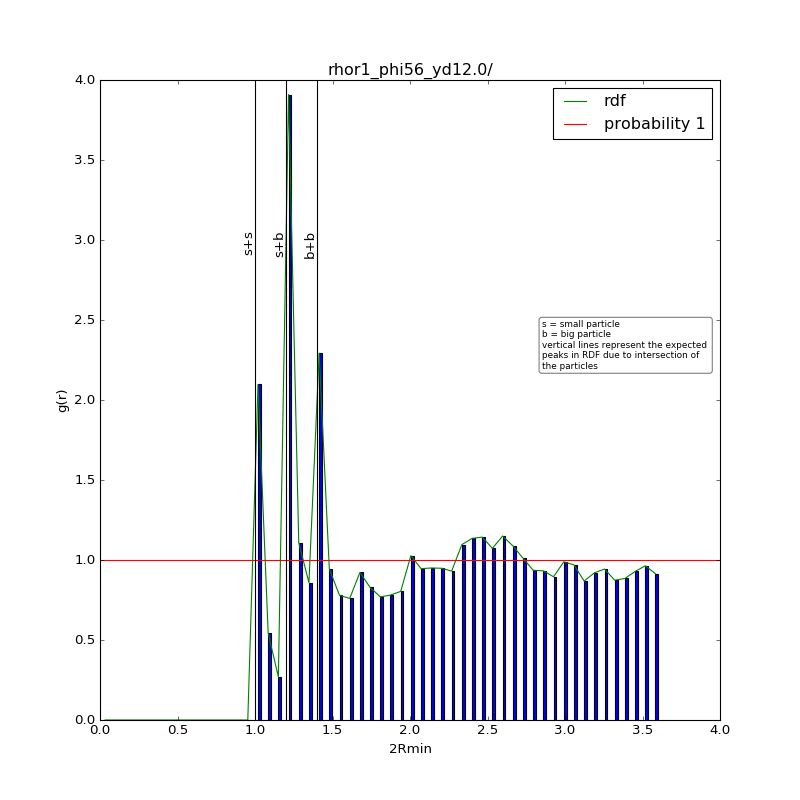

In [4]:
def rdf(phival, shearrate, bins):
    path = "rhor1_phi"+str(phival)+"_yd"+str(float(shearrate))+"/"
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    dataset.load_state(dataset.tlist[-10])

    positions = dataset.particles.r
    fluid_velocity = dataset.fluid.u
    L = dataset.L # Domain size
    LEs = dataset.LEs  # Lees-Edwards shift at time dataset.t
    LEu = dataset.LEu  # Lees-Edwards velocity

    sim_chars = sp.susi.extract_sim_characteristics(dataset)
    sim_chars['histogram'] = {'bins': bins, 'range': (0, 2.8376564979553224e-05)}

    rdf = sp.spatial.radial_distribution_function(positions,**sim_chars)
    plt.figure(figsize=[10,10])
    plt.plot(rdf[0]/(2*np.min(sim_chars['radius'])),rdf[1],"g",label="rdf")
    plt.bar(rdf[0]/np.min(2*np.min(sim_chars['radius'])),rdf[1],width = 1.0/sim_chars['histogram']['bins'])
    plt.axhline(1.0,color="r",label="probability 1")

    # s = sim_chars['radius'].min()
    # b = sim_chars['radius'].max()

    s = 4
    b = 11.2/2
    import inspect, re

    def plot_vline(loc, text):
        plt.axvline(loc/float(2*s),color="k")
        plt.text(loc/float(2*s),3,text, ha = 'right',rotation=90)

    plot_vline(s+s,"s+s")
    plot_vline(s+b,"s+b")
    plot_vline(b+b,"b+b")

    # plot_vline(s+s+s,"s+s+s")
    # plot_vline(s+s+b,"s+s+b")
    # plot_vline(s+b+b,"s+b+b")
    # plot_vline(b+b+b,"b+b+b")

    # plot_vline(s+s+s+s,"s+s+s+s")
    # plot_vline(s+s+s+b,"s+s+s+b")
    # plot_vline(s+s+b+b,"s+s+b+b")
    # plot_vline(s+b+b+b,"s+b+b+b")
    # plot_vline(b+b+b+b,"b+b+b+b")

    plt.legend()
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    plt.text(2.85, 2.5, "s = small particle \nb = big particle \nvertical lines represent the expected \npeaks in RDF due to intersection of \nthe particles"
             , fontsize=8, verticalalignment='top', bbox=props, wrap=True)
    plt.xlabel("2Rmin")
    plt.ylabel("g(r)")
    plt.title(path)
    #plt.savefig("radial_distribution_function")


v = interactive(rdf, \
                phival = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],value = 12),\
                bins=(10,100), __manual=False)

display(v)

---------------------------------------

---------------------------------------


In [5]:
# dataset = sp.reader.DataSet(path,particles=True, fluid=True)
# sim_chars = sp.susi.extract_sim_characteristics(dataset)
# sim_chars['histogram'] = {'bins': 100, 'range': (0, 2.8376564979553224e-05)}
# sim_chars['histogramdd']={"bins":(20, 20, 20)}
# pdf = sp.spatial.pair_distribution_function(positions,**sim_chars)



In [6]:
from matplotlib.patches import Circle  # $matplotlib/patches.py

def circle( xy, radius, color="lightsteelblue", facecolor="none", alpha=1, ax=None ):
    """ add a circle to ax= or current axes
    """
        # from .../pylab_examples/ellipse_demo.py
    e = Circle( xy=xy, radius=radius )
    if ax is None:
        ax = plt.gca()  # ax = subplot( 1,1,1 )
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_edgecolor( color )
    e.set_facecolor( facecolor )  # "none" not None
    e.set_alpha( alpha )
    
def plot_pdf(path):
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    dataset.load_state(dataset.tlist[-1])
    sim_chars['histogramdd']={"bins":(30,30,30)}
    pdf2d = filter.PairDistributionFunction2D(dataset,**sim_chars)
    X = pdf2d[0]/1e-6
    Y = pdf2d[1]/1e-6
    Z = pdf2d[2]
    plt.figure()
    im = plt.imshow(Z, extent=(X.min(), X.max(), Y.max(), Y.min()),interpolation='bicubic')


    plt.title(path)
    plt.colorbar(im)

# print np.sort(get_folder_list())
# s = 4
# b = 11.2/2
# for path in np.sort(get_folder_list()[:]):
#     try:
#         plot_pdf(path)
#     except Exception as e:
#         print e
#         continue

## Plot the radial distribution function g(r) as a function of distance


<IPython.core.display.Javascript object>


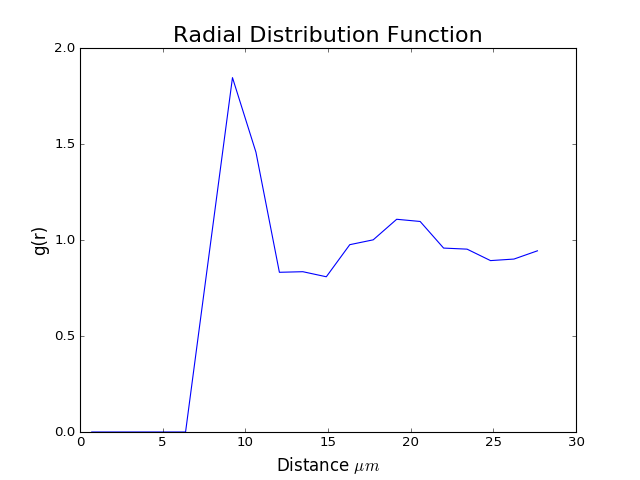

In [7]:
path = 'rhor1_phi56_yd12.0/'
dataset = sp.reader.DataSet(path,particles=True, fluid=True)
dataset.load_state(dataset.tlist[-10])


exp = dataset
plt.figure();
# print exp.keys()
# sim_chars = sp.susi.extract_sim_characteristics(exp)
# sim_chars['histogram'] = {'bins': 1000, 'range': (0, 2.8376564979553224e-05)}
# exp['histogram'] = sim_chars['histogram']
# exp['bin'] = 1000
# print exp['bins']

distance, rdf = exp['radial_distribution_function']
plt.plot(distance * 1e6, rdf);
plt.xlabel('Distance $\mu{m}$',fontsize=15);
plt.ylabel('g(r)', fontsize=15);
plt.title('Radial Distribution Function', fontsize=20);

---------------------------------------


## Lampros standard code for PDF (pair distribution function) at one time step

In [8]:
def lampros_pdf(phival, shearrate, t):
    path = "rhor1_phi"+str(phival)+"_yd"+str(float(shearrate))+"/"
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    dataset.load_state(dataset.tlist[t])
    exp = dataset

    plt.figure();
    distance, pdf = exp['pair_distribution_function']

    XX, ZZ = np.meshgrid(distance[0], distance[2])
    pdf = pdf[:, pdf.shape[1] / 2, :]

    plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pdf)
    plt.colorbar()
    y_mum = 1e6 * distance[1][pdf.shape[1] / 2]

    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
    plt.title('PDF at t = '+str(t)+'$y={:.1f} \mu{{m}}$'.format(y_mum), fontsize=20);

v = interactive(lampros_pdf, \
                phival = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],value = 12),\
                t=(-1000,-1,1), __manual=True)

display(v)

---------------------------------------


# Lampros code averged over time range

In [9]:
f = FloatProgress(min=0, max=100)
display(f)
L = widgets.Label("")
display(L)
def lampros_pdf(phival, shearrate, trange):
    path = "rhor1_phi"+str(phival)+"_yd"+str(float(shearrate))+"/"
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    dataset.load_state(dataset.tlist[-1])
    exp = dataset
    distance, pdf = exp['pair_distribution_function']
    XX, ZZ = np.meshgrid(distance[0], distance[2])
    pdf = pdf[:, pdf.shape[1] / 2, :]    
    XX_tot, ZZ_tot, pdf_tot = np.zeros_like(XX),np.zeros_like(ZZ), np.zeros_like(pdf)
    n = 0.0
    for i,t in enumerate(range(trange[1],trange[0],-1)):
        n+= 1.0
        f.value = float(i+1)/len(range(trange[1],trange[0],-1))*100
        L.value = "snapshot at t ="+str(dataset.tlist[t])
        dataset.load_state(dataset.tlist[t])
        exp = dataset
 
        distance, pdf = exp['pair_distribution_function']
        XX, ZZ = np.meshgrid(distance[0], distance[2])
        pdf = pdf[:, pdf.shape[1] / 2, :]
        XX_tot += XX
        ZZ_tot += ZZ
        pdf_tot += pdf
    plt.figure();
    XX_tot, ZZ_tot, pdf_tot = XX_tot/n, ZZ_tot/n, pdf_tot/n
    plt.pcolor(XX_tot.T * 1e6, ZZ_tot.T * 1e6, pdf_tot)
    plt.colorbar()
    y_mum = 1e6 * distance[1][pdf_tot.shape[1] / 2]

    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
    plt.title('PDF at $y={:.1f} \mu{{m}}$'.format(y_mum), fontsize=20);

v = interactive(lampros_pdf, \
                phival = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],value = 12),\
                trange=widgets.IntRangeSlider(value=[-10, -1], max=-1, min=-1000.0),__manual=True)
                
display(v)

---------------------------------------


## Eric Code for PDF at one time step

In [10]:
# Eric's code for a PDF with higher resolution
from matplotlib.colors import LogNorm

path = 'rhor1_phi56_yd1.0/'
type = "xy"

def plot_pdf_one_timestep(phi,shearrate,time,bins):
    try:
        time = int(time)
        path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
        dataset = sp.reader.DataSet(path,particles=True, fluid=True)
        dataset.load_state(dataset.tlist[time])
        exp = dataset

        #Create the size of the area that you want to bin the distances in
        limit = 5 * exp.particles.radius.max()
#         print (exp.particles.radius.max())
#         print (limit)
    #     bins = 41
        global edges
        global pair_df
        (edges, pair_df) = sp.spatial.correlations.pair_distribution_function(exp.particles.r,
             L=exp.L, LEs=exp.LEs, histogramdd={"bins":(bins, bins, bins),"range":((-limit,limit),(-limit,limit),(-limit,limit))})
    except:
        print "Unexpected error:", sys.exc_info()[0]
        raise


def plot_plot_pdf_one_timestep(phi,shearrate,time ,xz_vmax,xy_vmax,yz_vmax,bins,analyze_,size,show=True):
    if show:
        plt.ion()
    else:
        plt.ioff()
        
    if analyze_:
        plot_pdf_one_timestep(phi,shearrate,time,bins)

    #Calculate the distances and bin them

    #Plot them in a color mesh
    #pcolor plots have a tendency to leave out one row/column of "pixels". It will not immediately plot the entire
    #range. To compensate, the defined meshgrid needs to be 1 "pont" bigger  than the image that you want.

    #Add a value to "edges" by first determining bin stepsize and then appending one step to edges

    max=edges[0][bins-1]+(edges[0][1]-edges[0][0])
    new0=np.append(edges[0],max)
    new1=np.append(edges[1],max)
    new2=np.append(edges[2],max)

    # X-Z PLANE
    #Create the mesh grid, but shift by half a bin to correctly center the image
#     plt.figure(figsize=[17,5])
#     plt.figure(figsize=[3.4*size,1*size])
    plt.figure(figsize=[3*size,3*size])
    plt.subplot(221)
    XX, ZZ = np.meshgrid(new0-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[:, pair_df.shape[1] / 2, :]

    plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax = xz_vmax)#, vmin=0, vmax=10
#     plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf,norm=LogNorm(vmin=0.01,vmax = xz_vmax))#, vmin=0, vmax=10
    plt.colorbar()
#         y_mum = 1e6 * edges[1][pair_df.shape[1] / 2]
    y_mum =  1e6 * ( edges[1][1] -edges[1][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$');
    plt.ylabel('$\Delta{z}$ $(\mu{m})$');
    plt.title('PDF at t='+str(time)+'$y={:.2f} \mu{{m}}$ for phi='.format(y_mum)+str(phi)+" yd="+str(shearrate).format(y_mum));
#     print "ymum="+str(y_mum)

#X-Y PLANE

    plt.subplot(222)
    XX, YY = np.meshgrid(new0-7.31208644e-07/2, new1-7.31208644e-07/2)
    pairdf = pair_df[:,:, pair_df.shape[2] / 2]

    plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf,vmin=0,vmax = xy_vmax)
    plt.colorbar()
    z_mum = 1e6 * ( edges[2][1] -edges[2][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$');
    plt.ylabel('$\Delta{y}$ $(\mu{m})$');
#         plt.title('PDF at t='+str(time)+'$z={:.2f} \mu{{m}}$'.format(z_mum));
    plt.title('PDF at t='+str(time)+'$z={:.2f} \mu{{m}}$ for phi='.format(z_mum)+str(phi)+" yd="+str(shearrate).format(z_mum));
#Y-Z PLANE

    plt.subplot(223)
    YY, ZZ = np.meshgrid(new1-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[pair_df.shape[0] / 2,:,:]

    plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax = yz_vmax)
    plt.colorbar()
#         x_mum = 1e6 * edges[0][pair_df.shape[0] / 2]
    x_mum = 1e6 * ( edges[0][1] -edges[0][0] )  
    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{y}$ $(\mu{m})$');
    plt.ylabel('$\Delta{z}$ $(\mu{m})$');
    plt.tight_layout()
#         plt.title('PDF at t='+str(time)+'$x={:.2f} \mu{{m}}$'.format(x_mum));
    plt.title('PDF at t='+str(time)+'$x={:.2f} \mu{{m}}$ for phi='.format(x_mum)+str(phi)+" yd="+str(shearrate).format(x_mum));
    
    plt.subplot(224)
    nufilepath = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))+"/result/nu_t.dat"
    db = pd.read_csv(nufilepath)
    plt.plot(db[db.columns[2]])
    plt.axvline(time)
    plt.xlabel("timestep")
    plt.ylabel("Viscosity Pa.s")
    plt.yscale("log")
    
    name = "plots/cluster_analysis_phi"+str(phi)+"_yd"+str(shearrate).replace('.','_')+"_t"+str(int(time))
#     print name 
    plt.savefig(name)


v = interactive(plot_plot_pdf_one_timestep, \
                phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                                 value = 12),\
                #time = widgets.IntSlider(min= -1000, max= -1,value = -1, step = -1,orientation = "vertical"),\
                #time = widgets.IntSlider(max= 1000, min= 1,value = 1, step = 1,orientation = "vertical"),\
                time = widgets.FloatText(value=1),\
                bins = widgets.IntSlider(min = 11,max = 101,value = 31, step = 1,orientation = "vertical"),\
                size = widgets.FloatSlider(min = 1,max = 10,value = 3.75, step = 0.25,orientation = "vertical"),\
                xz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "vertical",description = "xz colorbax max"),\
                xy_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "vertical",description = "xy colorbax max"),\
                yz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "vertical",description = "yz colorbax max"),\
                analyze_ = widgets.widget_bool.Checkbox(value=True,description= "Analyze?"),\
                __manual=True)
display(widgets.VBox(v.children[:2]))
display(widgets.HBox(v.children[2:-1]))
display(widgets.HBox(v.children[-1:]))
display(widgets.Label(value = "Run analyze every time you change the dataset. No need to analyze when changing plot charecteristics"))

## plot pdf of a range of snaphots and animate 

In [11]:
progress = widgets.IntProgress(value=0)
def plot_time_frames(phi,shearrate,tmin, tmax ,xz_vmax,xy_vmax,yz_vmax,bins,analyze_,size,show):
    for plot_time_frames_progress,time in enumerate(range(tmin, tmax)):
        progress.value = float(plot_time_frames_progress)/len(range(tmin, tmax))*100
        plot_plot_pdf_one_timestep(phi,shearrate,time,xz_vmax,xy_vmax,yz_vmax,bins,analyze_,size,show)
        

v_plot_time_frames = interactive(plot_time_frames, \
                phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                                 value = 12.5),\
                #time = widgets.IntSlider(min= -1000, max= -1,value = -1, step = -1,orientation = "vertical"),\
                #time = widgets.IntSlider(max= 1000, min= 1,value = 1, step = 1,orientation = "vertical"),\
                tmin = widgets.widget_int.BoundedIntText(value=730,min=1,max=10000),\
                tmax = widgets.widget_int.BoundedIntText(value=735, min=1,max=10000),\
                bins = widgets.IntSlider(min = 11,max = 101,value = 31, step = 1,orientation = "vertical"),\
                size = widgets.FloatSlider(min = 1,max = 10,value = 3.75, step = 0.25,orientation = "vertical"),\
                xz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "vertical",description = "xz colorbax max"),\
                xy_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "vertical",description = "xy colorbax max"),\
                yz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "vertical",description = "yz colorbax max"),\
                analyze_ = widgets.widget_bool.Checkbox(value=True,description= "Analyze?"),\
                show=widgets.Checkbox(value=False),\
                __manual=True)
display(widgets.VBox(v_plot_time_frames.children[:2]))
display(widgets.HBox(v_plot_time_frames.children[4:-1]))
display(widgets.HBox(v_plot_time_frames.children[2:4]))
display(widgets.HBox(v_plot_time_frames.children[-1:]))
display(progress)
display(widgets.Label(value = "Run analyze every time you change the dataset. \
                            No need to analyze when changing plot charecteristics"))
play = widgets.Play(disabled=False)
slider = widgets.IntSlider(min=v_plot_time_frames.children[2].value, max = v_plot_time_frames.children[3].value)
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.jslink((slider, 'min'), (play, 'min'))
widgets.jslink((slider, 'max'), (play, 'max'))
display(widgets.HBox([play, slider]))

link3 = widgets.jslink((v_plot_time_frames.children[3], 'value'), (v_plot_time_frames.children[2], 'max'))
link4 = widgets.jslink((v_plot_time_frames.children[2], 'value'), (v_plot_time_frames.children[3], 'min'))
link1 = widgets.jslink((v_plot_time_frames.children[2], 'value'), (slider, 'min'))
link2 = widgets.jslink((v_plot_time_frames.children[3], 'value'), (slider, 'max'))


philabel = widgets.Label(value = "")
ydlabel = widgets.Label(value = "")
tminlabel = widgets.Label(value = "")
tmaxlabel = widgets.Label(value = "")
tlabel = widgets.Label(value = "")

# link5 = widgets.jslink((v.children[0], 'value'), (philabel, 'value'))
# link6 = widgets.jslink((v.children[1], 'value'), (ydlabel, 'value'))
# link7 = widgets.jslink((v.children[2], 'value'), (tminlabel, 'value'))
# link8 = widgets.jslink((v.children[3], 'value'), (tmaxlabel, 'value'))
# link9 = widgets.jslink((slider, 'value'), (tlabel, 'value'))
# display(philabel,ydlabel,tminlabel,tmaxlabel,tlabel)



filename = widgets.Label(value="")
def handle_data_change(change):
    filename.value =  "plots/cluster_analysis_phi"+str(v_plot_time_frames.children[0].value)+"_yd"+\
                    str(v_plot_time_frames.children[1].value).replace('.','_')+"_t"+str(slider.value)+".png"
for i in v_plot_time_frames.children:
    i.observe(handle_data_change, names='value')
    
slider.observe(handle_data_change,names='value')
display(filename)

from IPython.display import Image
# def handle_image_change(change):
#     if os.path.exists(filename.value):
#         pdf_figure = Image(filename.value)
# display(pdf_figure)
# slider.observe(handle_image_change,'value')

image = widgets.Image(value = "",width=800, height=800)
imagesize = widgets.IntText(value =400, description="image size")
widgets.jslink((imagesize,'value'),(image,'width'))
widgets.jslink((imagesize,'value'),(image,'height'))
display(imagesize)
display(image)
def handle_image_change(change):
    if os.path.exists(filename.value):
        image.value = open(filename.value).read()
        
slider.observe(handle_image_change,'value')

---------------------------------------


# Eric Code for average PDF over time

## TimeSeries Information Between snapshots

<IPython.core.display.Javascript object>


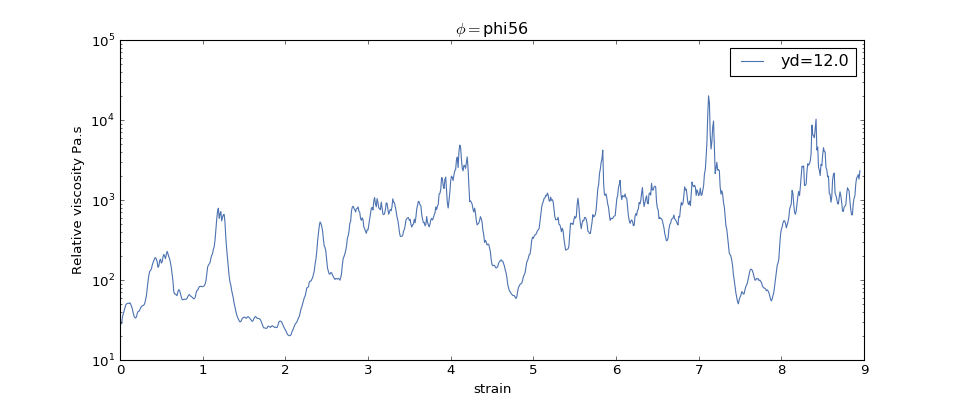

Total timesteps :894
Available timesteps :794


In [12]:

def plot_timeseries(phival,ydvals,vrange):
    plt.style.use('seaborn-deep')
    l = []
    phival = "phi"+str(phival)
    for f in get_folder_list():
        try:
            if f.split("_")[1] == phival:
                l.append(f)
        except:
            continue
    nufiles = [f+"/result/nu_t.dat" for f in l]
    plt.figure(figsize=[12,5])
    minshear = 100000
    for f in np.sort(nufiles):
        try:
            db = pd.read_csv(f)
            nu = db[db.columns[2]]
            nu_rel = db[db.columns[4]]
            t = db[db.columns[1]]
            shearrate = float(f.split("_")[2].split("/")[0].split("yd")[1])
            if shearrate in ydvals: 
                shear = t*shearrate
                if minshear > shear.max(): minshear = shear.max()
                plt.plot(shear[vrange[0]: vrange[1]],nu_rel[vrange[0]: vrange[1]],label="yd="+str(shearrate))
#                 print vrange[0]
#                 plt.plot(shear,nu_rel,label="yd="+str(shearrate))
                print "Total timesteps :"+str(len(shear))
                print "Available timesteps :"+str(int(len(shear) - len(shear)/float(shear.max())))
        except:
            continue
    plt.legend(loc="best")
    plt.title("$\phi=$"+str(phival))
    plt.yscale("log")
    plt.xlabel("strain")
    plt.ylabel("Relative viscosity Pa.s")

#     plt.xlim([0,minshear])
    name = "comparison_viscosity_" + str(phival)+ '_'.join([str(i) for i in ydvals])
#     plt.savefig(name)

time_series = interactive(plot_timeseries, \
                vrange = widgets.IntRangeSlider(min = 0, max = 1500,value = [0,1000]),\
                phival = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                ydvals= widgets.SelectMultiple(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],value=[12.0]),\
                __manual=False)

display(time_series)

## Plot averaged PDF

### PDF averaged over a over a time range 

Averaged PDF over a specified time range is plotted here.

In [13]:
# Eric's code for a PDF with higher resolution
from susipop.susi.cache import SusiCache as cache


f = FloatProgress(min=0, max=100)

L = widgets.Label("")

display_cache_status = widgets.Label("")


def _plot_pdf_timerange(phi,time ,shearrate,bins = 41):
    cachefilename = "./cache/" + "phi_"+str(phi)+"_shearrate_"+str(float(shearrate)).replace(".","_")+".h5"
    pdfcache = cache(cachefile=cachefilename)
    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    tmin, tmax = time[0], time[1]
    if tmax > len(dataset.tlist):
        tmax = len(dataset.tlist)
    step = 1.0
    global edges
    global pair_df
    
    for t in range(tmin,tmax,1):
        if not pdfcache.has_data(t,"edges") and not pdfcache.has_data(t,"pair_df"):
            dataset.load_state(dataset.tlist[t])
            exp = dataset
            #Create the size of the area that you want to bin the distances in
            limit = 5 * exp.particles.radius.max()
    #         cachename = "pdf_phi_"+str(phi)+"_shearrate_"+str(shearrate).replace(".","_")+"_time"+str(t)
            #Calculate the distances and bin them
            (edges, pair_df) = sp.spatial.correlations.pair_distribution_function(exp.particles.r,
                 L=exp.L, LEs=exp.LEs, histogramdd={"bins":(bins, bins, bins),"range":((-limit,limit),(-limit,limit),(-limit,limit))})
            datadict= dict()
            datadict["edges"] = edges
            datadict["pair_df"] = pair_df
            pdfcache.save_data(t,{"edges":edges, "pair_df":pair_df})
            display_cache_status.value ="saving data to cache: "+cachefilename+" for timestep :"+ str(t)
        else:
            edges = pdfcache.load_data(t,"edges")
            pair_df = pdfcache.load_data(t,"pair_df")
            display_cache_status.value = " loading from cache :"+cachefilename+" for timestep"+ str(t)
        if step == 1: edges_tot, pair_df_tot = np.zeros_like(edges), np.zeros_like(pair_df)
        edges_tot += edges
        pair_df_tot += pair_df
        step += 1.0
        f.value = step/int(tmax-tmin+1)*100
        L.value = str(int(step/int(tmax-tmin+1)*100))+"% completed"

    edges = edges_tot/step
    pair_df = pair_df_tot/step


def plot_pdf_timerange(phi,time ,shearrate,bins, xz_vmax,xy_vmax,yz_vmax,analyze_,autorange,save_fig):
    if analyze_:
        _plot_pdf_timerange(phi,time ,shearrate,bins)
    #Plot them in a color mesh
    #pcolor plots have a tendency to leave out one row/column of "pixels". It will not immediately plot the entire
    #range. To compensate, the defined meshgrid needs to be 1 "pont" bigger  than the image that you want.

    #Add a value to "edges" by first determining bin stepsize and then appending one step to edges
    max=edges[0][bins-1]+(edges[0][1]-edges[0][0])
    new0=np.append(edges[0],max)
    new1=np.append(edges[1],max)
    new2=np.append(edges[2],max)

    # X-Z PLANE
    #Create the mesh grid, but shift by half a bin to correctly center the image
    plt.figure(figsize=[10,10])

    plt.subplot(221)
    XX, ZZ = np.meshgrid(new0-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[:, pair_df.shape[1] / 2, :]

    if autorange == True: plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax=xz_vmax)
    else: plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf)
        
    plt.colorbar()
#         y_mum = 1e6 * edges[1][pair_df.shape[1] / 2]
    y_mum =  1e6 * ( edges[1][1] -edges[1][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
    plt.title('PDF at $y={:.2f} \mu{{m}}$ for phi='.format(y_mum)+str(phi)+" yd="+str(shearrate).format(y_mum), fontsize=15);
    print "ymum="+str(y_mum)

    #X-Y PLANE
    plt.subplot(222)
    XX, YY = np.meshgrid(new0-7.31208644e-07/2, new1-7.31208644e-07/2)
    pairdf = pair_df[:,:, pair_df.shape[2] / 2]

    if autorange== True: plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf,vmin=0,vmax=xy_vmax)
    else: plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf)
        
    plt.colorbar()
    z_mum = 1e6 * ( edges[2][1] -edges[2][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{y}$ $(\mu{m})$', fontsize=15);
    plt.title('PDF at $z={:.2f} \mu{{m}}$ for phi='.format(z_mum)+str(phi)+" yd="+str(shearrate).format(z_mum), fontsize=15);

    #Y-Z PLANE
    plt.subplot(223)
    YY, ZZ = np.meshgrid(new1-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[pair_df.shape[0] / 2,:,:]

    if autorange== True: plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax=yz_vmax)
    else: plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf)
    plt.colorbar()
    x_mum = 1e6 *( edges[0][1] -edges[0][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{y}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
    plt.title('PDF at $x={:.2f} \mu{{m}}$ for phi='.format(x_mum)+str(phi)+" yd="+str(shearrate).format(x_mum), fontsize=15);
    
    plt.subplot(224)
    tmin, tmax = time[0], time[1]
    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    nupath = path + "/result/nu_t.dat"
    db = pd.read_csv(nupath)
    nu = db[db.columns[2]]
    nu_rel = db[db.columns[4]]
    t = db[db.columns[1]]
#     dt = abs(t[2]-t[1])
    shear = t*shearrate
    shear_tmin = t[tmin-1]*shearrate
    try:
        shear_tmax =  t[tmax-1]*shearrate
    except:
        shear_tmax =  t[len(t)-1]*shearrate
    print shear_tmin, shear_tmax
    plt.plot(shear, nu)
    
    plt.axvline(shear_tmin)
    plt.axvline(shear_tmax)
    plt.yscale("log")
    plt.ylabel("viscosity")
    plt.xlabel("strain")
    if save_fig:
        plt.savefig("pdf_phi_"+str(phi)+"_shearrate_"+str(shearrate).replace(".","_")+"_trange"+str(tmin)+"_"+str(tmax))
        



pdf_average_timerange = interactive(plot_pdf_timerange, \
                phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                                 value = 12),\
                xz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 3, step = 0.25,orientation = "vertical",description = "xz colorbax max"),\
                xy_vmax = widgets.FloatSlider(min= 0, max= 15,value = 3, step = 0.25,orientation = "vertical",description = "xy colorbax max"),\
                yz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 3, step = 0.25,orientation = "vertical",description = "yz colorbax max"),\
                analyze_ = widgets.ToggleButtons(options=[True,False],value = True,description= "Analyze?"),\
                save_fig = widgets.ToggleButtons(options=[True,False],value = False,description="Save figure?"),\
                autorange = widgets.ToggleButtons(options=[True,False],value = True,description="Manual color range?"),\
                time = widgets.IntRangeSlider(min= 1, max= 1500,value = [0,1000], step = 1),\
                bins = widgets.IntSlider(options = [11,101],value = 41, step = 2,orientation = "vertical"),__manual=True)
display(widgets.VBox(pdf_average_timerange.children[0:3]))
display(widgets.HBox(pdf_average_timerange.children[3:-1]))
# display(widgets.HBox(pdf_average_timerange.children[7:-1]))
display(f)
display(L)
display(display_cache_status)
display(pdf_average_timerange.children[-1])



## PDF averaged over a timesteps with a specific viscosity range 

PDF is calculated over all the timesteps that have a viscosity in a specific range  

In [14]:
# Eric's code for a PDF with higher resolution
from susipop.susi.cache import SusiCache as cache


f = FloatProgress(min=0, max=100)
L = widgets.Label("")


def _plot_pdf_timerange(phi,viscosity_range ,shearrate,bins = 41):
    cachefilename = "./cache/" + "phi_"+str(phi)+"_shearrate_"+str(float(shearrate)).replace(".","_")+".h5"
    print cachefilename
    pdfcache = cache(cachefile=cachefilename)
    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)

    min_viscosity = viscosity_range[0]
    max_viscosity = viscosity_range[1]
    
    
    nudata = pd.read_csv(path+"/result/nu_t.dat",names=["t","time", "nu","nu_var","nur","nur_var)"])
    idx_list = np.where((nudata["nur"] < max_viscosity) & (nudata["nur"] > min_viscosity) )[0]
    t_list = nudata["t"][idx_list]
#     print t_list
    
    global edges
    global pair_df
    step = 1 
    
    for t in idx_list:
        if not pdfcache.has_data(t,"edges") and not pdfcache.has_data(t,"pair_df"):
            dataset.load_state(dataset.tlist[t])
            exp = dataset
            #Create the size of the area that you want to bin the distances in
            limit = 5 * exp.particles.radius.max()
    #         cachename = "pdf_phi_"+str(phi)+"_shearrate_"+str(shearrate).replace(".","_")+"_time"+str(t)
            #Calculate the distances and bin them
            (edges, pair_df) = sp.spatial.correlations.pair_distribution_function(exp.particles.r,
                 L=exp.L, LEs=exp.LEs, histogramdd={"bins":(bins, bins, bins),"range":((-limit,limit),(-limit,limit),(-limit,limit))})
            datadict= dict()
            datadict["edges"] = edges
            datadict["pair_df"] = pair_df
            pdfcache.save_data(t,{"edges":edges, "pair_df":pair_df})
            display_cache_status.value ="saving data to cache: "+cachefilename+" for timestep :"+ str(t)
        else:
            edges = pdfcache.load_data(t,"edges")
            pair_df = pdfcache.load_data(t,"pair_df")
            display_cache_status.value = " loading from cache :"+cachefilename+" for timestep"+ str(t)
        if step == 1: edges_tot, pair_df_tot = np.zeros_like(edges), np.zeros_like(pair_df)
        edges_tot += edges
        pair_df_tot += pair_df
        step += 1.0
        f.value = step/len(t_list)*100
        L.value = str(int(step/len(t_list)*100))+"% completed"

    edges = edges_tot/step
    pair_df = pair_df_tot/step


def plot_pdf_timerange(phi,viscosity_range ,shearrate,bins, xz_vmax,xy_vmax,yz_vmax,analyze_,autorange, save_fig):
    
    if analyze_:
        _plot_pdf_timerange(phi,viscosity_range ,shearrate,bins)
    #Plot them in a color mesh
    #pcolor plots have a tendency to leave out one row/column of "pixels". It will not immediately plot the entire
    #range. To compensate, the defined meshgrid needs to be 1 "pont" bigger  than the image that you want.

    #Add a value to "edges" by first determining bin stepsize and then appending one step to edges
    max=edges[0][bins-1]+(edges[0][1]-edges[0][0])
    new0=np.append(edges[0],max)
    new1=np.append(edges[1],max)
    new2=np.append(edges[2],max)

    # X-Z PLANE
    #Create the mesh grid, but shift by half a bin to correctly center the image
    plt.figure(figsize=[10,10])

    plt.subplot(221)
    XX, ZZ = np.meshgrid(new0-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[:, pair_df.shape[1] / 2, :]

#     plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax=xz_vmax)
    if autorange == True: plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax=xz_vmax)
    else: plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf)
    plt.colorbar()
#         y_mum = 1e6 * edges[1][pair_df.shape[1] / 2]
    y_mum =  1e6 * ( edges[1][1] -edges[1][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
    plt.title('PDF at $y={:.2f} \mu{{m}}$ for phi='.format(y_mum)+str(phi)+" yd="+str(shearrate).format(y_mum), fontsize=15);
    print "ymum="+str(y_mum)

    #X-Y PLANE
    plt.subplot(222)
    XX, YY = np.meshgrid(new0-7.31208644e-07/2, new1-7.31208644e-07/2)
    pairdf = pair_df[:,:, pair_df.shape[2] / 2]

#     plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf,vmin=0,vmax=xy_vmax)
    if autorange == True: plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf,vmin=0,vmax=xy_vmax)
    else: plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf)
        
    plt.colorbar()
    z_mum = 1e6 * ( edges[2][1] -edges[2][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{y}$ $(\mu{m})$', fontsize=15);
    plt.title('PDF at $z={:.2f} \mu{{m}}$ for phi='.format(z_mum)+str(phi)+" yd="+str(shearrate).format(z_mum), fontsize=15);

    #Y-Z PLANE
    plt.subplot(223)
    YY, ZZ = np.meshgrid(new1-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[pair_df.shape[0] / 2,:,:]

#     plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax=yz_vmax)
    if autorange == True: plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax=yz_vmax)
    else: plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf)
    plt.colorbar()
    x_mum = 1e6 *( edges[0][1] -edges[0][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{y}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
    plt.title('PDF at $x={:.2f} \mu{{m}}$ for phi='.format(x_mum)+str(phi)+" yd="+str(shearrate).format(x_mum), fontsize=15);
    
    plt.subplot(224)
#     tmin, tmax = time[0], time[1]
    min_viscosity = viscosity_range[0]
    max_viscosity = viscosity_range[1]


    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    nupath = path + "/result/nu_t.dat"
    db = pd.read_csv(nupath,names=["t","time", "nu","nu_var","nur","nur_var)"])
    nu = db["nu"]
    nu_rel = db["nur"]
    t = db["time"]
    idx_list_valid = np.where((db["nur"] < max_viscosity) & (db["nur"] > min_viscosity) )[0]
    idx_list_invalid = np.where((db["nur"] > max_viscosity) | (db["nur"] < min_viscosity) )[0]

    
    #     dt = abs(t[2]-t[1])
    shear = t*shearrate
#     shear_tmin = t[tmin-1]*shearrate
    
    plt.plot(shear[idx_list_valid], nu_rel[idx_list_valid],'r.',label="data points used ")
    plt.plot(shear[idx_list_invalid], nu_rel[idx_list_invalid],'b.',label="data points not used")
    plt.legend(loc = 'best',prop={'size':8})
#     try:
#         shear_tmax =  t[tmax-1]*shearrate
#     except:
#         shear_tmax =  t[len(t)-1]*shearrate
        
#     print shear_tmin, shear_tmax
#     plt.plot(shear, nu)
    plt.yscale("log")
    plt.ylabel("relative viscosity")
    plt.xlabel("strain")
    if save_fig:
        plt.savefig("pdf_phi_"+str(phi)+"_shearrate_"+str(shearrate).replace(".","_")+"_viscosity_range"+str(min_viscosity)+"_"+str(max_viscosity))
        



pdf_average_viscosity = interactive(plot_pdf_timerange, \
                phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                                 value = 12),\
                xz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 2.75, step = 0.05,orientation = "vertical",description = "xz colorbax max"),\
                xy_vmax = widgets.FloatSlider(min= 0, max= 15,value = 2.75, step = 0.05,orientation = "vertical",description = "xy colorbax max"),\
                yz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 2.75, step = 0.05,orientation = "vertical",description = "yz colorbax max"),\
                analyze_ = widgets.ToggleButtons(options=[True,False],value = True,description= "Analyze?"),\
                save_fig = widgets.ToggleButtons(options=[True,False],value = False,description="Save figure?"),\
                autorange = widgets.ToggleButtons(options=[True,False],value = True,description="Manual color range?"),\
                viscosity_range = widgets.IntRangeSlider(min= 1, max= 1e5,value = [1,1000], step = 1, description= "relative viscosity range"),\
                bins = widgets.IntSlider(options = [11,101],value = 41, step = 2,orientation = "vertical"),__manual=True)
display(widgets.VBox(pdf_average_viscosity.children[0:3]))
display(widgets.HBox(pdf_average_viscosity.children[3:-1]))
# display(widgets.HBox(pdf_average_viscosity.children[7:-1]))
display(f)
display(L)
display(display_cache_status)
display(pdf_average_viscosity.children[-1])

## PDF averaged over timesteps with a specific 1st normal stress difference range

In [15]:

# Eric's code for a PDF with higher resolution
from susipop.susi.cache import SusiCache as cache


f = FloatProgress(min=0, max=100)
L = widgets.Label("")
display_cache_status = widgets.Label("")

def _plot_pdf_timerange(phi,N1_range ,shearrate,invert_range, bins = 41):
    cachefilename = "./cache/" + "phi_"+str(phi)+"_shearrate_"+str(float(shearrate)).replace(".","_")+".h5"
    pdfcache = cache(cachefile=cachefilename)
    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)

    min_N1 = N1_range[0]
    max_N1 = N1_range[1]
    
    
    n1data = pd.read_csv(path+"/result/part_stress_norm_tot_t.dat")
    s11 = np.asarray(n1data[n1data.columns[2]])
    s22 = np.asarray(n1data[n1data.columns[3]])
    s33 = np.asarray(n1data[n1data.columns[4]])
    N1 = s11 - s33
    N2 = s33 - s22
    
    if not invert_range: idx_list = np.where((N1 < max_N1) & (N1 > min_N1) )[0]
    else: idx_list = np.where((N1 > max_N1) | (N1 < min_N1) )[0]
#     print idx_list
    global edges
    global pair_df
    step = 1 
    
    for t in idx_list:
        if not pdfcache.has_data(t,"edges") and not pdfcache.has_data(t,"pair_df"):
            dataset.load_state(dataset.tlist[t])
            exp = dataset
            #Create the size of the area that you want to bin the distances in
            limit = 5 * exp.particles.radius.max()

            (edges, pair_df) = sp.spatial.correlations.pair_distribution_function(exp.particles.r,
                 L=exp.L, LEs=exp.LEs, histogramdd={"bins":(bins, bins, bins),"range":((-limit,limit),(-limit,limit),(-limit,limit))})
            datadict= dict()
            datadict["edges"] = edges
            datadict["pair_df"] = pair_df
            pdfcache.save_data(t,{"edges":edges, "pair_df":pair_df})
            display_cache_status.value ="saving data to cache: "+cachefilename+" for timestep :"+ str(t)
        else:
            edges = pdfcache.load_data(t,"edges")
            pair_df = pdfcache.load_data(t,"pair_df")
            display_cache_status.value = " loading from cache :"+cachefilename+" for timestep"+ str(t)
        if step == 1: edges_tot, pair_df_tot = np.zeros_like(edges), np.zeros_like(pair_df)
        edges_tot += edges
        pair_df_tot += pair_df
        step += 1.0
        f.value = step/len(idx_list)*100
        L.value = str(int(step/len(idx_list)*100))+"% completed"

    edges = edges_tot/step
    pair_df = pair_df_tot/step


def plot_pdf_timerange(phi,N1_range ,shearrate,bins, xz_vmax,xy_vmax,yz_vmax,analyze_,autorange, save_fig,invert_range):
    
    if analyze_:
        _plot_pdf_timerange(phi,N1_range ,shearrate,invert_range,bins)
    #Plot them in a color mesh
    #pcolor plots have a tendency to leave out one row/column of "pixels". It will not immediately plot the entire
    #range. To compensate, the defined meshgrid needs to be 1 "pont" bigger  than the image that you want.

    #Add a value to "edges" by first determining bin stepsize and then appending one step to edges
    max=edges[0][bins-1]+(edges[0][1]-edges[0][0])
    new0=np.append(edges[0],max)
    new1=np.append(edges[1],max)
    new2=np.append(edges[2],max)

    # X-Z PLANE
    #Create the mesh grid, but shift by half a bin to correctly center the image
    plt.figure(figsize=[10,10])

    plt.subplot(221)
    XX, ZZ = np.meshgrid(new0-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[:, pair_df.shape[1] / 2, :]

    if autorange == True: plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax=xz_vmax)
    else: plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf)
    plt.colorbar()
#         y_mum = 1e6 * edges[1][pair_df.shape[1] / 2]
    y_mum =  1e6 * ( edges[1][1] -edges[1][0] )    

    plt.axis([-16,16,-16,16])
#     plt.axis([-26,26,-26,26])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15,labelpad=-5);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15,labelpad=-10);
    plt.title('PDF at $y={:.2f} \mu{{m}}$ for phi='.format(y_mum)+str(phi)+" yd="+str(shearrate).format(y_mum), fontsize=15);
    print "ymum="+str(y_mum)

    #X-Y PLANE
    plt.subplot(222)
    XX, YY = np.meshgrid(new0-7.31208644e-07/2, new1-7.31208644e-07/2)
    pairdf = pair_df[:,:, pair_df.shape[2] / 2]

    if autorange == True: plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf,vmin=0,vmax=xy_vmax)
    else: plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf)
        
    plt.colorbar()
    z_mum = 1e6 * ( edges[2][1] -edges[2][0] )    

    plt.axis([-16,16,-16,16])
#     plt.axis([-26,26,-26,26])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15,labelpad=-5);
    plt.ylabel('$\Delta{y}$ $(\mu{m})$', fontsize=15,labelpad=-10);
    plt.title('PDF at $z={:.2f} \mu{{m}}$ for phi='.format(z_mum)+str(phi)+" yd="+str(shearrate).format(z_mum), fontsize=15);

    #Y-Z PLANE
    plt.subplot(223)
    YY, ZZ = np.meshgrid(new1-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[pair_df.shape[0] / 2,:,:]

    if autorange == True: plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax=yz_vmax)
    else: plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf)
    plt.colorbar()
    x_mum = 1e6 *( edges[0][1] -edges[0][0] )    

    plt.axis([-16,16,-16,16])
#     plt.axis([-26,26,-26,26])
    plt.xlabel('$\Delta{y}$ $(\mu{m})$', fontsize=15,labelpad=-5);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15,labelpad=-10);
    plt.title('PDF at $x={:.2f} \mu{{m}}$ for phi='.format(x_mum)+str(phi)+" yd="+str(shearrate).format(x_mum), fontsize=15);
    
    plt.subplot(224)

    min_N1 = N1_range[0]
    max_N1 = N1_range[1]
    
    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    n1data = pd.read_csv(path+"/result/part_stress_norm_tot_t.dat")
    s11 = np.asarray(n1data[n1data.columns[2]])
    s22 = np.asarray(n1data[n1data.columns[3]])
    s33 = np.asarray(n1data[n1data.columns[4]])
    t   = np.asarray(n1data[n1data.columns[1]])
    shear = t*shearrate
    N1 = s11 - s33
    N2 = s33 - s22
    plt.plot(shear,N1)
    if not invert_range:
        idx_list_valid = np.where((N1 < max_N1) & (N1 > min_N1) )[0]
        idx_list_invalid = np.where((N1 > max_N1) | (N1 < min_N1) )[0]
    else:
        idx_list_valid = np.where((N1 > max_N1) | (N1 < min_N1) )[0]
        idx_list_invalid = np.where((N1 < max_N1) & (N1 > min_N1) )[0]
        
    print len(N1)
    print len(s11)
    plt.ion()
    plt.plot(shear[idx_list_valid],N1[idx_list_valid],'r.', label = "data points used ")
    plt.plot(shear[idx_list_invalid],N1[idx_list_invalid],'b.', label = "data points not used ")
    plt.legend(loc = 'best', prop={'size':8} )
    plt.ylabel("N1(Pa)",labelpad=-10)
    plt.xlabel("strain",labelpad=-5)
    
    if save_fig:
        plt.savefig("pdf_phi_"+str(phi)+"_shearrate_"+str(shearrate).replace(".","_")+"_N1_range"+str(min_N1).replace(".","_")+"to"+str(max_N1).replace(".","_"))
        



pdf_average_N1 = interactive(plot_pdf_timerange, \
                phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                                 value = 12),\
                xz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 2.75, step = 0.25,orientation = "vertical",description = "xz colorbax max"),\
                xy_vmax = widgets.FloatSlider(min= 0, max= 15,value = 2.75, step = 0.25,orientation = "vertical",description = "xy colorbax max"),\
                yz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 2.75, step = 0.25,orientation = "vertical",description = "yz colorbax max"),\
                analyze_ = widgets.ToggleButtons(options=[True,False],value = True,description= "Analyze?"),\
                save_fig = widgets.ToggleButtons(options=[True,False],value = False,description="Save figure?"),\
                autorange = widgets.ToggleButtons(options=[True,False],value = True,description="Manual color range?"),\
                invert_range = widgets.ToggleButtons(options=[True,False],value = False,description="Search inverse value range?"),\
                N1_range = widgets.FloatRangeSlider(min= -1e5, max= 1e5,value = [-10000.00,-1.00],  description= "N1 range"),\
                bins = widgets.IntSlider(options = [11,101],value = 41, step = 2,orientation = "vertical"),__manual=True)
#display(pdf_average )
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
display(widgets.VBox(pdf_average_N1.children[0:3]))
display(widgets.HBox(pdf_average_N1.children[3:]))
# display(widgets.HBox(pdf_average_N1.children[7:-1]))
display(f)
display(L)
display(display_cache_status)
# display(pdf_average_N1.children[-1])

## Velocity autocorrelations

In [16]:
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
# def scatter3d(x,y,z, cs, colorsMap='jet'):
#     cm = plt.get_cmap(colorsMap)
#     cNorm = mpl.colors.Normalize(vmin=min(cs), vmax=max(cs))
#     scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
#     fig = plt.figure()
#     ax = Axes3D(fig)
#     ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
#     scalarMap.set_array(cs)
#     fig.colorbar(scalarMap)
#     plt.show()
from scipy.interpolate import griddata
def intp(x,y,z,bins):
    H, xedges, yedges = np.histogram2d(x, y,bins=bins, weights=z)
    H = H.T  # Let each row list bins with common y range.
#     fig = plt.figure()
#     ax = fig.add_subplot(131, title='imshow: square bins')
    plt.imshow(H, interpolation='nearest', origin='low', extent = (min(x), max(x), min(y), max(y)))
#     plt.xlim([40,60])
#     plt.ylim([40,60])
    
f = FloatProgress(min=0, max=100)
L = widgets.Label("")
def _plot_vaf(phi,shearrate,timerange,bins):
    #cachefilename = "./cache/" + "phi_"+str(phi)+"_shearrate_"+str(float(shearrate)).replace(".","_")+".h5"
    #pdfcache = cache(cachefile=cachefilename)
    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    dataset.load_state(dataset.tlist[1])
    positions = dataset.particles.r
    velocities = dataset.particles.newton_velocity
#     print positions
#     print velocities
    vaf_pos = []
    vaf_val = []
#     timerange = np.asarray(timerange)
    timerange = list(timerange)
    print timerange
    tlist = dataset.tlist[timerange[0]:timerange[1]]
        
    for idx,t in enumerate(tlist):
        dataset.load_state(t)
        f.value = float(idx)/len(tlist)*100.0
        L.value = str(float(idx)/len(tlist)*100.0)
        for i,vi in enumerate(velocities):
            for j,vj in enumerate(velocities):
                if j!=i:
                    if np.linalg.norm(positions[j] - positions[i]) < 30e-6:
                        vaf_val.append(np.multiply(vi,vj))
                        vaf_pos.append(positions[j] - positions[i])
    vaf_pos = np.asanyarray(vaf_pos)
    vaf_val = np.asanyarray(vaf_val)
#     print vaf_pos.shape
#     print vaf_val.shape
    x = [i[0]*1e6 for i in vaf_pos]
    y = [i[1]*1e6 for i in vaf_pos]
    z = [i[2]*1e6 for i in vaf_pos]
    val_norm = [np.linalg.norm(i) for i in vaf_val]
    val_x = [i[0] for i in vaf_val]
    val_y = [i[1] for i in vaf_val]
    val_z = [i[2] for i in vaf_val]
    #scatter3d(x,y,z,val)
    plt.figure(figsize=[15,5])
    plt.subplot(1,3,1)
    intp(x,y,val_norm,bins)
#     plt.scatter(x,y, c = val_z ,alpha=0.03)
    plt.subplot(1,3,2)
    intp(x,z,val_norm,bins)
#     plt.scatter(x,z, c = val_y,alpha=0.03)
    plt.subplot(1,3,3)
    intp(y,z,val_norm,bins)
#     plt.scatter(y,z, c = val_x,alpha=0.03)
    plt.show()
vaf_average = interactive(_plot_vaf, \
    phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
    shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                 value = 12),\
    timerange = widgets.IntRangeSlider(value = [1,3], min = 1, max = 1500,step = 1),\
    bins = widgets.IntSlider(min=1,max=300,value=100),\
    __manual = True)

#display(pdf_average )
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
display(vaf_average)
display(f)
display(L)



# Susi cluster analysis

In [17]:
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import *
import matplotlib.pyplot as plt
import numpy as np
from random import random, seed
from matplotlib import cm


def scatter3d(fig, x,y,z,cs):
#     cm = plt.get_cmap(colorsMap)
#     cNorm = mpl.colors.Normalize(vmin=min(cs), vmax=max(cs))
#     scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
#     fig = plt.figure()
#     ax = Axes3D(fig)
#     ax.scatter(x, y, z, color = cs)
#     scalarMap.set_array(cs)
#     fig.colorbar(scalarMap)
#     plt.show()
    ax = fig.gca(projection='3d')               # to work in 3d
    plt.hold(True)
    ax.scatter( x,y,z,color = cs)

f = widgets.FloatProgress(min=0,max=100)
progress_stat = widgets.Label(value = "")


def susi_cluster_analysis(phi,shearrate,gap):
    #cachefilename = "./cache/" + "phi_"+str(phi)+"_shearrate_"+str(float(shearrate)).replace(".","_")+".h5"
    #pdfcache = cache(cachefile=cachefilename)
    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    cachefilename = "./cache/" + "phi_"+str(phi)+"_shearrate_"+str(float(shearrate)).replace(".","_")+".h5"
    clustercache = cache(cachefile=cachefilename)
    dataset = sp.reader.DataSet(path,particles=True, fluid=True,cachefile=cachefilename)
#     timerange[1] = min(len(dataset.tlist)-2, timerange[1])
    viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
    strain = np.asarray(viscosity_file[viscosity_file.columns[1]][1:])*shearrate
    viscosity = np.asarray(viscosity_file[viscosity_file.columns[4]][1:])
    single_particle_percent = []
    print "max timestep =", len(dataset.tlist)-2
    for i,time_idx in enumerate(range(1, len(dataset.tlist))):
        f.value = float(i)/len((range(1, len(dataset.tlist))))*100
        progress_stat.value = str(float(i)/len((range(1, len(dataset.tlist))))*100)
        try:
            if not clustercache.has_data(dataset.tlist[time_idx],"single_particle_percent_gap_"+str(gap)):
                dataset.load_state(dataset.tlist[time_idx])
#                 sim_chars = sp.susi.extract_sim_characteristics(dataset)
#                 sim_chars = sp.susi.extract_sim_characteristics(dataset, **sim_chars)
#                 positions = dataset.particles.r
#                 clusters = sp.spatial.create_cluster(positions, **sim_chars)
#                 sim_chars["gap"] = gap
#                 clusters = sp.spatial.create_cluster(positions, **sim_chars)
#                 cluster_d = sp.spatial.cluster_size_distribution(positions,**sim_chars)
#                 particle_cluster_ids = sp.spatial.particleId_to_clusterId(positions, clusters=clusters)
            #     print clusters
        #         print map(len,clusters)
#                 spp = sp.spatial.single_particle_percentage(positions, cluster_distribution=cluster_d)
                spp = dataset.get_quantity("single_particle_percentage",update=True, gap=gap)
                single_particle_percent.append(spp)
                clustercache.save_data(dataset.tlist[time_idx],{"single_particle_percent_gap_"+str(gap):spp})
            else:
                single_particle_percent.append(clustercache.load_data(dataset.tlist[time_idx],"single_particle_percent_gap_"+str(gap)))
        except:
            continue
    min_size = min(len(viscosity),len(single_particle_percent))
    print "correlation between viscosity and percent single particles: ", np.corrcoef(single_particle_percent[:min_size], viscosity[:min_size])[0, 1]
    plt.figure()
    plt.plot(strain[:min_size],single_particle_percent[:min_size],label = "single particle percent")
    plt.plot(strain[:min_size],viscosity[:min_size], label = "viscosity")
    plt.legend()
    plt.yscale("log")
    plt.xlabel("strain")
    plt.ylabel("viscosity Pa.s / Percent single particles")
    plt.title("Viscosity & single particle percent for min_gap = " + str(gap*1e6) + "$\mu$m" )
#         cluster_size_distribution = sp.spatial.cluster_size_distribution( positions,clusters=clusters, **sim_chars)
#     fig = plt.figure()
#     plt.hold(True)
#     for i in range(len(clusters)):
# #         print i
#         x = positions[list(clusters[i])].T[0]
#         y = positions[list(clusters[i])].T[1]
#         z = positions[list(clusters[i])].T[2]
# #         print x,y,z
#         if len(clusters[i]) == 1:
#             scatter3d(fig,[x],[y],[z], 'g')
#         else:
#             scatter3d(fig,x,y,z,'r')

    
    
    #positions[list(clusters[-1])].T[0]
    #plt.plot(positions[list(clusters[-1])].T[0], positions[list(clusters[-1])].T[2],'r.')
    #print cluster_size_distribution
    
    
susi_cluster_analysis_widget = interactive(susi_cluster_analysis, \
    phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
    shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                 value = 12),\
    timerange = widgets.IntRangeSlider(value = [100,800],min = 1, max =1000 ),\
    gap = widgets.FloatText(value=9e-8),\
    __manual = True)

#display(pdf_average )
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(susi_cluster_analysis_widget)
# display(f)
# display(progress_stat)

In [18]:

# dataset = reader.DataSet("rhor1_phi56_yd12.0/", particles=True, fluid=True)
# dataset.load_state(dataset.tlist[500])

# cluster_size_distribution = dataset.get_quantity("cluster_size_distribution",update=True, gap=2.5e-8)
# particle_cluster_ids = dataset.get_quantity("particle_cluster_ids",gap= 2e-8)
# clusters = dataset.get_quantity("clusters",gap= 2e-8)

# print "clusters\n" ,clusters
# print "cluster_size_distribution\n", cluster_size_distribution
# print "particle_cluster_ids\n",particle_cluster_ids, len(particle_cluster_ids)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# clrs = np.random.random((len(exp['clusters']), 3))
# c = clrs[exp['particle_cluster_ids'], :]
# pos = exp['positions'] * 1e6
# x, y, z = pos[:, 0], pos[:, 1], pos[:, 2]
# ax.scatter(x, y, z, c=c)

# plt.title ("Particles colored by cluster",fontsize=20);
# ax.set_xlabel('X ($\mu m$)',fontsize=15);
# ax.set_ylabel('Y ($\mu m$)',fontsize=15);
# ax.set_zlabel('Z ($\mu m$)',fontsize=15);

# ax.set_xlim(-(((exp.L[2]*1000000)/2)-((exp.L[0]*1000000)/2)),(((exp.L[2]*1000000)/2)+((exp.L[0]*1000000)/2)));
# ax.set_ylim(-(((exp.L[2]*1000000)/2)-((exp.L[1]*1000000)/2)),(((exp.L[2]*1000000)/2)+((exp.L[1]*1000000)/2)));
# ax.set_zlim(0, exp.L[2]*1000000);

# print ('Cluster Analysis Gap: ', exp['gap'])
# print ('Cluster Size Distribution: ', exp['cluster_size_distribution'])
# print ('Mean Cluster Size: ', exp['mean_cluster_size'])
# import plotly.plotly

In [19]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
import warnings
init_notebook_mode(connected=True)

# import plotly.plotly as py
# import plotly.graph_objs as go

def cluster_size_distribution_plotly(phi,shearrate,time,min_viscosity_state,max_viscosity_state, gap,minsize):
    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
    viscosity = np.asarray(viscosity_file[viscosity_file.columns[4]][1:])
    min_visc_time= np.where(viscosity == min(viscosity[50:]))[0][0] 
    max_visc_time = np.where(viscosity == max(viscosity[50:]))[0][0] 
    if min_viscosity_state: 
        time = min_visc_time
    if max_viscosity_state:
        time = max_visc_time
    print "time =",time
    dataset.load_state(dataset.tlist[time])
#     gap = 4e-8
    clusters = dataset.get_quantity("clusters", gap = gap)
    s,ns = dataset.get_quantity("cluster_size_distribution",update=True, gap=gap)
    pos = dataset['positions'] * 1e6
    print len(dataset.tlist), "steps available"
    data = []
    for i in range(len(s)):
        if ns[i] != 0:
            print "size=",s[i],  "clusters=",ns[i]
    if ns[-1] == dataset.npart: 
        print "all individual particles"
    else:
        import random
        r = lambda: str(random.randint(0,255))
    #     plt.figure()
        col = []
        for i in range(dataset.npart):
            col.append("rgb(" + r()+","+r()+","+r()+")")

        for cluster in clusters:
            if len(cluster) >= minsize:
                x, y, z = pos[cluster, 0], pos[cluster, 1], pos[cluster, 2]
                trace = Scatter3d(
                    x=x, y=y, z=z,
                    marker=dict(
                        size=10,
                        color=col[len(cluster)],
                        colorscale='Viridis',
                    ),
                    line=dict(
                        color=col[len(cluster)],
                        width=0
                    ),
                    name = "cluster size = "+str(len(cluster))
                )
                data.append(trace)
        # data = [trace]
        try:
            layout = dict(
                width=800,
                height=700,
                autosize=True,
            #     title='Iris dataset',
                scene=dict(
                    xaxis=dict(
                        gridcolor='rgb(255, 255, 255)',
                        zerolinecolor='rgb(255, 255, 255)',
                        showbackground=True,
                        backgroundcolor='rgb(230, 230,230)'
                    ),
                    yaxis=dict(
                        gridcolor='rgb(255, 255, 255)',
                        zerolinecolor='rgb(255, 255, 255)',
                        showbackground=True,
                        backgroundcolor='rgb(230, 230,230)'
                    ),
                    zaxis=dict(
                        gridcolor='rgb(255, 255, 255)',
                        zerolinecolor='rgb(255, 255, 255)',
                        showbackground=True,
                        backgroundcolor='rgb(230, 230,230)'
                    ),
                    camera=dict(
                        up=dict(
                            x=0,
                            y=0,
                            z=1
                        ),
                        eye=dict(
                            x=-1.7428,
                            y=1.0707,
                            z=0.7100,
                        )
                    ),
        #             aspectratio = dict( x=1, y=1, z=0.7 ),
                    aspectmode = 'manual'
                ),
            )

            fig = dict(data=data)

            iplot(fig)
        except Exception as e:
            
            print e

widget_cluster_size_distribution_plotly = interactive(cluster_size_distribution_plotly, \
    phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
    shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                 value = 12),\
    time = widgets.IntText(value = 100 ,min = 1, max =1000 ),\
    gap = widgets.FloatText(value=9e-8),\
    minsize = widgets.IntText(value = 3),\
    max_viscosity_state = widgets.ToggleButton(value= False),\
    min_viscosity_state = widgets.ToggleButton(value= False),\
    __manual = True)

#display(pdf_average )
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(widget_cluster_size_distribution_plotly)
# display(widgets.HBox(cluster_size_distribution.children[4:]))

In [20]:
# import plotly
# import plotly.plotly as py
# import plotly.graph_objs as go
# plotly.tools.set_credentials_file(username='vishnusivadasan7', api_key='ZLBPHF6HXSroNtji8tec')
# py.iplot([Scatter(x=[1,2,3], y=[5,8,9])])

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Figure, Layout

from plotly.graph_objs import *
import pandas as pd

print plotly.__version__

1.12.9


In [21]:
def cluster_size_distribution_matplotlib(phi,shearrate,time,min_viscosity_state,max_viscosity_state, gap,minsize, connect):
    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    print len(dataset.tlist), "steps available"
    viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
    viscosity = np.asarray(viscosity_file[viscosity_file.columns[4]][1:])
    min_visc_time= np.where(viscosity == min(viscosity[50:]))[0][0] 
    max_visc_time = np.where(viscosity == max(viscosity[50:]))[0][0] 
    if min_viscosity_state: 
        time = min_visc_time
        print "viscosity = ",viscosity[min_visc_time]
    if max_viscosity_state:
        time = max_visc_time
        print "viscosity = ", viscosity[max_visc_time]
    print "time =",time
    print dataset.npart, "particles used"
    dataset.load_state(dataset.tlist[time])
#     gap = 4e-8
    clusters = dataset.get_quantity("clusters", gap = gap)
    s,ns = dataset.get_quantity("cluster_size_distribution",update=True, gap=gap)
    pos = dataset['positions'] * 1e6
    data = []
    
    for i in range(len(s)):
        if ns[i] != 0:
            print "size=",s[i],  "clusters=",ns[i]
    print (1-ns[0]/float(dataset.npart))*100, "% particles in cluster"
    if ns[-1] == dataset.npart: 
        print "all individual particles"
    else:
        fig = plt.figure(figsize=[10,10])
        ax = fig.add_subplot(111, projection='3d')
        import random
        import matplotlib.cm as cm
#          r = lambda: random.randint(0,255)
    #     plt.figure()
#         col = []
#         for i in range(dataset.npart*2):
#         color = cm.rainbow(np.linspace(0, 1, dataset.npart))
        color = [np.random.rand(1,3) for i in range(dataset.npart)]
#         color = random.shuffle(color)
        for cluster in clusters:
            if len(cluster) >= minsize:
                x, y, z = pos[cluster, 0], pos[cluster, 1], pos[cluster, 2]
                col = color[len(cluster)][0]
                print col
                ax.scatter(x, y, z, s = 400, c=col,depthshade=True)
#                 ax.scatter(x, y, z, s = 400, c=[str(len(cluster)) for i in  x] ,depthshade=True)
                if connect: ax.plot3D(x, y, z)
                plt.xlabel('x axis $\mu m $')
                plt.ylabel('y axis $\mu m $')
                ax.set_zlabel('z axis $\mu m $')
                ax.view_init(azim=-90, elev=0)
widget_cluster_size_distribution_matplotlib = interactive(cluster_size_distribution_matplotlib, \
    phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
    shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                 value = 12),\
    time = widgets.IntText(value = 100 ,min = 1, max =1000 ),\
    gap = widgets.FloatText(value=9e-8),\
    minsize = widgets.IntText(value = 3),\
    max_viscosity_state = widgets.ToggleButton(value= False),\
    min_viscosity_state = widgets.ToggleButton(value= False),\
    connect = widgets.Checkbox(value= False, description = "connect points?"),\
    __manual = True)

#display(pdf_average )
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(widget_cluster_size_distribution_matplotlib)
# display(widgets.HBox(cluster_size_distribution.children[4:]))

In [22]:

# def cluster_size_distribution(phi,shearrate,time, gap, single_particles_visibility, clusters_visibility):
#     #cachefilename = "./cache/" + "phi_"+str(phi)+"_shearrate_"+str(float(shearrate)).replace(".","_")+".h5"
#     #pdfcache = cache(cachefile=cachefilename)
#     path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
#     dataset = sp.reader.DataSet(path,particles=True, fluid=True)
# #     timerange[1] = min(len(dataset.tlist)-2, timerange[1])
#     dataset.load_state(dataset.tlist[time])
#     s,ns = dataset.get_quantity("cluster_size_distribution",update=True, gap=gap)
# #     plt.subplot(122)

#     fig = plt.figure(figsize=[12,6])
#     ax = fig.add_subplot(121, projection='3d')
#     clusters = dataset.get_quantity("clusters",gap= gap)
#     cluster_ids = dataset.get_quantity("particle_cluster_ids",gap= gap)
#     cluster_dbn = dataset.get_quantity("cluster_size_distribution",update=False, gap=gap)
#     clusters_meansize = dataset.get_quantity("mean_cluster_size",update=True, gap=gap)
    
#     clrs = np.random.random((len(clusters), 3))
#     c = clrs[cluster_ids, :]
#     pos = dataset['positions'] * 1e6
#     for cluster in clusters:
#         if len(cluster) > 1 and clusters_visibility:
#             x, y, z = pos[cluster, 0], pos[cluster, 1], pos[cluster, 2]
#             col =np.random.random((1, 3))
#             ax.scatter(x, y, z, c=col,depthshade=True)
#             ax.plot3D(x, y, z)
#         elif len(cluster) == 1 and single_particles_visibility:
#             x, y, z = pos[cluster, 0], pos[cluster, 1], pos[cluster, 2]
#             ax.scatter(x, y, z, c='k',depthshade=True)
# #             ax.plot(x,y,z, '-b')
#         else:
#             continue
# #     ax.plot(x, y, z)
    
#     plt.title ("Particles colored by cluster",fontsize=20);
#     ax.set_xlabel('X ($\mu m$)',fontsize=15);
#     ax.set_ylabel('Y ($\mu m$)',fontsize=15);
#     ax.set_zlabel('Z ($\mu m$)',fontsize=15);

#     ax.set_xlim(-(((exp.L[2]*1000000)/2)-((exp.L[0]*1000000)/2)),(((exp.L[2]*1000000)/2)+((exp.L[0]*1000000)/2)));
#     ax.set_ylim(-(((exp.L[2]*1000000)/2)-((exp.L[1]*1000000)/2)),(((exp.L[2]*1000000)/2)+((exp.L[1]*1000000)/2)));
#     ax.set_zlim(0, exp.L[2]*1000000);
    
#     for i in range(len(s)):
#         if ns[i] != 0:
#             print "size=",s[i],  "clusters=",ns[i]
#     print ('Cluster Analysis Gap: ', exp['gap'])
# #     print ('Cluster Size Distribution: ', cluster_dbn)
#     print ('Mean Cluster Size: ', clusters_meansize)
    
# #     plt.figure()
#     ax = fig.add_subplot(122)
#     plt.plot(s, ns, 'o-');
#     plt.xlabel('size $s$ of cluster', fontsize=15);
#     plt.ylabel('Frequency $n(s)$', fontsize=15);
#     plt.title('Cluster size distribution', fontsize=15);

    
# cluster_size_distribution_widget = interactive(cluster_size_distribution, \
#     phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
#     shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
#                                  value = 12),\
#     time = widgets.IntText(value = 100 ,min = 1, max =1000 ),\
#     gap = widgets.FloatText(value=6.8e-8),\
#     single_particles_visibility = widgets.ToggleButton(value= True),\
#     clusters_visibility = widgets.ToggleButton(value=True),\
#     __manual = True)

# #display(pdf_average )
# # for i,item in enumerate(pdf_average.children):
# #     print i, item.description 
# map(display, cluster_size_distribution_widget.children[:4])
# display(widgets.HBox(cluster_size_distribution_widget.children[4:]))

In [23]:
def cluster_size_distribution_pathinput_matplotlib(path,time,min_viscosity_state,max_viscosity_state, gap,minsize, connect,show_viscosity_timeseries):
    path = path
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    print len(dataset.tlist), "steps available"
    print dataset.npart, "particles used"
    viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
    viscosity = np.asarray(viscosity_file[viscosity_file.columns[4]][1:])
    min_visc_time= np.where(viscosity == min(viscosity[50:]))[0][0] 
    max_visc_time = np.where(viscosity == max(viscosity[50:]))[0][0] 
    if min_viscosity_state: 
        time = min_visc_time
        print "viscosity = ",viscosity[min_visc_time]
    if max_viscosity_state:
        time = max_visc_time
        print "viscosity = ", viscosity[max_visc_time]
    print "time =",time
    dataset.load_state(dataset.tlist[time])
#     gap = 4e-8
    clusters = dataset.get_quantity("clusters", gap = gap)
    s,ns = dataset.get_quantity("cluster_size_distribution",update=True, gap=gap)
    pos = dataset['positions'] * 1e6
    data = []
    
    for i in range(len(s)):
        if ns[i] != 0:
            print "size=",s[i],  "clusters=",ns[i]
    print (1-ns[0]/float(dataset.npart))*100, "% particles in cluster"
    if show_viscosity_timeseries:
        plt.figure(figsize=[10,5])
        plt.plot(viscosity)
        plt.plot(time,viscosity[time],'ro')
    if ns[-1] == dataset.npart: 
        print "all individual particles"
    else:
        fig = plt.figure(figsize=[10,10])
        ax = fig.add_subplot(111, projection='3d')
        import random
        import matplotlib.cm as cm
#         r = lambda: random.randint(0,255)
    #     plt.figure()
#         col = []
#         for i in range(dataset.npart*2):
#         color = cm.rainbow(np.linspace(0, 1, dataset.npart))
        color = [np.random.rand(1,3) for i in range(dataset.npart)]
#         color = random.shuffle(color)
        for cluster in clusters:
            if len(cluster) >= minsize:
                x, y, z = pos[cluster, 0], pos[cluster, 1], pos[cluster, 2]
                col = color[len(cluster)][0]
#                 print col
                ax.scatter(x, y, z, s = 400, c=col,depthshade=True)
#                 ax.scatter(x, y, z, s = 400, c=[str(len(cluster)) for i in  x] ,depthshade=True)
                if connect: ax.plot3D(x, y, z)
                plt.xlabel('x axis $\mu m $')
                plt.ylabel('y axis $\mu m $')
                ax.set_zlabel('z axis $\mu m $')
                ax.view_init(azim=-90, elev=0)
widget_cluster_size_distribution_pathinput_matplotlib = interactive(cluster_size_distribution_pathinput_matplotlib, \
    path = widgets.Text(value="larger_system_size/rhor1_phi56_yd12.0"),\
    time = widgets.IntText(value = 100 ,min = 1, max =1000 ),\
    gap = widgets.FloatText(value=9e-8),\
    minsize = widgets.IntText(value = 3),\
    max_viscosity_state = widgets.ToggleButton(value= False),\
    min_viscosity_state = widgets.ToggleButton(value= False),\
    connect = widgets.Checkbox(value= False, description = "connect points?"),\
    show_viscosity_timeseries = widgets.Checkbox(value= True, description = "show viscosity timeseries?"),\
    __manual = True)

#display(pdf_average )
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(widget_cluster_size_distribution_pathinput_matplotlib)
# display(widgets.HBox(cluster_size_distribution.children[4:]))

In [24]:
Tabs = widgets.Tab()
container_list = []
tab_items_input = [
                  [susi_cluster_analysis_widget,"single particle percent and viscosity vs time "], 
                  [widget_cluster_size_distribution_plotly,"custers at a timestep using plotly"],
                  [widget_cluster_size_distribution_matplotlib,"custers at a timestep using matplotlib"],
                  [widget_cluster_size_distribution_pathinput_matplotlib,"manual path input for custers at a timestep using matplotlib" ]
                    ]
tab_items =  [i[0] for i in tab_items_input]
tab_name  =  [i[1] for i in tab_items_input]
for i, item in enumerate(tab_items_input): 
    container_list.append(widgets.Box())
    container_list[i].children = item[0].children
Tabs.children = tab_items
for i,name in enumerate(tab_name):
    Tabs.set_title(i,name)
        
display(Tabs)
display(f)
display(progress_stat)

# Min Gap Calculations

In [25]:

def f(gap):
    gap = gap/1e-6
    dmax = 1e-7
    c0 = 1e-4
    dm = 1e-15
    dx = 1e-6
    dt = 1.6633e-7
    drep = dmax/dx
    crep = c0/dm*dt**2/drep**2
    force_lu =  crep/drep**2*(gap-drep)**2/gap
    force = force_lu*dm*dx/dt**2
    return force
for x in np.linspace(1e-7,9e-8,1000000):
    if f(x) > 2e-10:
        print f(x), x
        break

2.00000049022e-10 9.56267456267e-08


dataset = reader.DataSet("rhor1_phi54_yd10.0/", particles=True, fluid=True)
gap_data_list = []

prog = widgets.FloatProgress()
display(prog)

for j,t in enumerate(dataset.tlist[1:10]):
    prog.value = float(j)/len(dataset.tlist[1:])*100
    try:
        dataset.load_state(t)
        dist = dataset.get_quantity("particle_particle_pair_distances",update=False)
        i = np.where(dist[1] == min(dist[1]))[0][0]
        #i = np.where(dist[1] < 9e-8)[0][0]
        #print i
        idx_r1 = dist[2][i][0]
        idx_r2 = dist[2][i][1]
        r1 = dataset.particles.radius[idx_r1]
        r2 = dataset.particles.radius[idx_r2]
        rij = dist[1][i]
        mingap = rij - r1 -r2
        force_fric_1 = np.linalg.norm(dataset.particles.force_fric[idx_r1])
        force_fric_2 = np.linalg.norm(dataset.particles.force_fric[idx_r2])
        shear_fric_1 = np.linalg.norm(dataset.particles.sshear_fric[idx_r1])
        shear_fric_2 = np.linalg.norm(dataset.particles.sshear_fric[idx_r2])
        loc_part1 = dataset.particles.r[idx_r1]
        loc_part2 = dataset.particles.r[idx_r2]
        print j,t,idx_r1,idx_r2,loc_part1, loc_part2, mingap, force_fric_1, force_fric_2,shear_fric_1, shear_fric_2
                
        gap_data_list.append([loc_part1, loc_part2, mingap, force_fric_1, force_fric_2,shear_fric_1, shear_fric_2,idx_r1,idx_r2,t,j])
    except Exception as e:
        print e
        continue

dataset = reader.DataSet("rhor1_phi54_yd10.0/", particles=True, fluid=True)
dataset.load_state(dataset.tlist[-1])
dataset["clusters"]

gap_data_list_ = []
len(gap_data_list_)
for i in gap_data_list:
    if sum(i[3:6]) == 0 :  
        if i[2] < 9e-8:
            gap_data_list_.append(i)

plt.figure()
x = range(len(gap_data_list_))
t = [i[10] for i in gap_data_list_]
timestep = [i[9] for i in gap_data_list_]
x1 = [i[0][0] for i in gap_data_list_]
x2 = [i[1][0] for i in gap_data_list_]
z1 = [i[0][2] for i in gap_data_list_]
z2 = [i[1][2] for i in gap_data_list_]
B1 = [i[7] for i in gap_data_list_]
B2 = [i[8] for i in gap_data_list_]
print len(B1)
print np.unique([B1])
print np.unique([B2])
cs1 = plt.scatter(x1,z1, c=B1,cmap=cm.jet,vmin=0.,vmax=dataset.npart)
cs2 = plt.scatter(x2,z2, c=B2,cmap=cm.jet,vmin=0.,vmax=2.)
plt.colorbar(cs1)
plt.ylabel("z coord")
plt.ylim([0,6e-5])
plt.xlim([0,10e-5])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel("cases without friction with gap < 9e-8")
plt.xlabel("x coord")
plt.xlabel("timestep")
plt.show()

Plotting the force vs friction using a manually created function,

def r(ri, rj, rad1, rad2):
    return np.linalg.norm(ri - rj) - (rad1+rad2)
dataset = reader.DataSet("rhor1_phi54_yd10.0/", particles=True, fluid=True)

particle_pairs = []
gap_data_temp = []

prog = widgets.FloatProgress()
display(prog)
for k,t in enumerate(dataset.tlist[1:]):
    dataset.load_state(t)
    prog.value = float(k)/len(dataset.tlist)*100
    for i in range(dataset.npart):
        for j in range(dataset.npart):
            if j > 1:
                particle_pairs.append([i,j])
                ri = dataset.particles.r[i]
                rj = dataset.particles.r[j]
                rad1 = dataset.particles.radius[i]
                rad2 = dataset.particles.radius[j]
                F_fric = np.linalg.norm(dataset.particles.force_fric[i])
                Shear_fric = np.linalg.norm(dataset.particles.sshear_fric[i])
                gap_data_temp.append([t,i,j,ri,rj,r(ri, rj, rad1, rad2),F_fric, Shear_fric])

gap_data_1 = np.asarray([[i[0], i[1],i[2],i[5],i[6],i[7]] for i in gap_data_temp]  )
gap_data_2 = np.asarray([[i[3][0],i[3][1],i[3][2],i[4][0],i[4][1],i[4][2]] for i in gap_data_temp])

neg_id = np.where(gap_data_1.T[3] < 0)[0]
large_gap_id = np.where(gap_data_1.T[3] > 9e-8)[0]
friction_id1 = np.where(gap_data_1.T[4] !=0)[0]
friction_id2 = np.where(gap_data_1.T[5] !=0)[0]
del_id = np.concatenate([neg_id,large_gap_id,friction_id1,friction_id2])
del_id = np.unique(del_id)
gap_data_1_corr = np.delete(gap_data_1 , (del_id),axis=0)
gap_data_2_corr = np.delete(gap_data_2 , (del_id),axis=0)

plt.figure()
plt.plot(gap_data_1_corr[:,3],gap_data_1_corr[:,4],'k.')
plt.axvline(9e-8,label="friction cutoff")
plt.xscale("log")
plt.legend(loc="best")
plt.xlabel("gap")
plt.ylabel("Force")
plt.suptitle("gap vs force in particle pairs")

dataset = reader.DataSet("rhor1_phi54_yd10.0/", particles=True, fluid=True)
gap_data_list = []

prog = widgets.FloatProgress()
display(prog)

for j,t in enumerate(dataset.tlist[1:]):
    prog.value = float(j)/len(dataset.tlist[1:])*100
    try:
        dataset.load_state(t)
        dist = dataset.get_quantity("particle_particle_pair_distances",update=True)
        i = np.where(dist[1] == min(dist[1]))[0][0]
#         i = np.where(dist[1] < 9e-8)[0][0]
        #print i
        idx_r1 = dist[2][i][0]
        idx_r2 = dist[2][i][1]
        r1 = dataset.particles.radius[idx_r1]
        r2 = dataset.particles.radius[idx_r2]
        rij = dist[1][i]
        mingap = rij - r1 -r2
        force_fric_1 = np.linalg.norm(dataset.particles.force_fric[idx_r1])
        force_fric_2 = np.linalg.norm(dataset.particles.force_fric[idx_r2])
        shear_fric_1 = np.linalg.norm(dataset.particles.sshear_fric[idx_r1])
        shear_fric_2 = np.linalg.norm(dataset.particles.sshear_fric[idx_r2])
        loc_part1 = dataset.particles.r[idx_r1]
        loc_part2 = dataset.particles.r[idx_r2]
        print j,t,idx_r1,idx_r2,loc_part1, loc_part2, mingap, force_fric_1, force_fric_2,shear_fric_1, shear_fric_2
                
        gap_data_list.append([loc_part1, loc_part2, mingap, force_fric_1, force_fric_2,shear_fric_1, shear_fric_2,idx_r1,idx_r2,t,j])
    except Exception as e:
        print e
        continue

# Cluster size vs number of clusters plot

label1 = widgets.Label("")
label_cache = widgets.Label(value = "")
progress1 = widgets.IntProgress(min = 0, max = 100, value = 0)

def cluster_size_vs_cluster_probability_matplotlib(phi,shearrate,time,plot_for_all_data,gap,alpha,viscosity_limits):
    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    print len(dataset.tlist), "steps available"
    s_data = np.asarray([])
    ns_data = np.asarray([])
    cache_file = cache(cachefile=dataset.cachefile)
    
    viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
    viscosity = np.array(viscosity_file[viscosity_file.columns[4]][1:])
    viscosity_limits_idx = np.where((viscosity<viscosity_limits[1]) & (viscosity>viscosity_limits[0]))[0]
    time = viscosity_limits_idx 
    if plot_for_all_data : 
        time = np.asarray(range(1,len(dataset.tlist[1:])))
        viscosity_text = " for all timesteps"
    else:
        viscosity_text = " relative viscosity range="+ str(viscosity_limits)
#     print time
    for i,t in enumerate([dataset.tlist[i] for i in time]):
        progress1.value = int(float(i)/len(time)*100)
        try:
            if cache_file.has_data(t,"cluster_size_distribution_gap_"+str(gap)):
                label_cache.value = "loading data for t="+str(t)
                s, ns = cache_file.load_data(t,"cluster_size_distribution_gap_"+str(gap))
                idx = np.where(ns != 0)[0]
                s_data = np.concatenate([s_data , s[idx]])
                ns_data = np.concatenate([ns_data , ns[idx]])
                label1.value = str(s[idx])
            else:
                dataset.load_state(t)
                s, ns = dataset.get_quantity("cluster_size_distribution", gap = gap, update=True)
                cache_file.save_data(t,{"cluster_size_distribution_gap_"+str(gap):[s, ns]})
                idx = np.where(ns != 0)[0]
                s_data = np.concatenate([s_data , s[idx]])
                ns_data = np.concatenate([ns_data , ns[idx]])
                label1.value = str(s[idx])
        except Exception as e:
            print e
    uniq_sizes = np.unique(s_data)
    ns_data_cumulative = np.zeros_like(uniq_sizes)
    for i, item in enumerate(uniq_sizes):
        idx_uniq = np.where(s_data == item)[0]
        ns_data_cumulative[i] = sum(ns_data[idx_uniq])
    x,y = uniq_sizes, ns_data_cumulative
#     x_new = np.linspace(x[0], x[-1], num=len(x)*10)
#     import numpy.polynomial.polynomial as poly
#     coefs = poly.polyfit(x, y, 20)
#     ffit = poly.polyval(x_new, coefs)
    def zipfs(k,s,N):
        denom = sum([1.0/i**s for i in range(1,int(N+1))])
        num = 1.0/k**s
        return num/denom
    
    plt.figure(figsize=[12,5])
    plt.subplot(1,2,1)
    plt.loglog(x,  y/float(max(y)),'k')
    plt.loglog(x,  y/float(max(y)),'rx')
    #uncomment to enable zipf's law visualization
#     plt.loglog(range(1,int(max(x))),  [zipfs(i,alpha,max(x)) for i in range(1,int(max(x)))],label= "zipfs law")
#     plt.plot(x_new, ffit, 'r')
    plt.legend()
    plt.xlim([0,1e3])
    plt.ylim([1e-7,2])
    plt.xlabel("N")
    plt.ylabel("P(N)")
    plt.suptitle(path+" gap="+str(gap)+viscosity_text)
    
    plt.subplot(1,2,2)
    plt.plot(range(len(viscosity)), viscosity, 'b.')
    plt.plot(viscosity_limits_idx, viscosity[viscosity_limits_idx],'r.', label="used data points")
    plt.legend()
    plt.xlabel("timesteps")
    plt.ylabel("relative viscosity")
    plt.yscale("log")
    
    print uniq_sizes, ns_data_cumulative
    
widget_cluster_size_vs_cluster_probability_matplotlib = interactive(cluster_size_vs_cluster_probability_matplotlib, \
    phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
    shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000], value = 12),\
    time = widgets.IntRangeSlider(value = [1,1000] ,min = 1, max =1000 ),\
    plot_for_all_data = widgets.ToggleButtons(options = [True,False], value=False),\
    gap = widgets.ToggleButtons(options=[9e-8,6.7e-8,4e-8,1e-8], value = 9e-8),\
    alpha = widgets.FloatText(value = 2.5),\
    viscosity_limits = widgets.IntRangeSlider(value=[0,100], min = 0, max = 1000000),\
    __manual = True)
display(widget_cluster_size_vs_cluster_probability_matplotlib)
display(label1)
display(progress1)
display(label_cache)
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(widget_cluster_size_distribution_matplotlib)
# display(widgets.HBox(cluster_size_distribution.children[4:]))

902 steps available


<IPython.core.display.Javascript object>


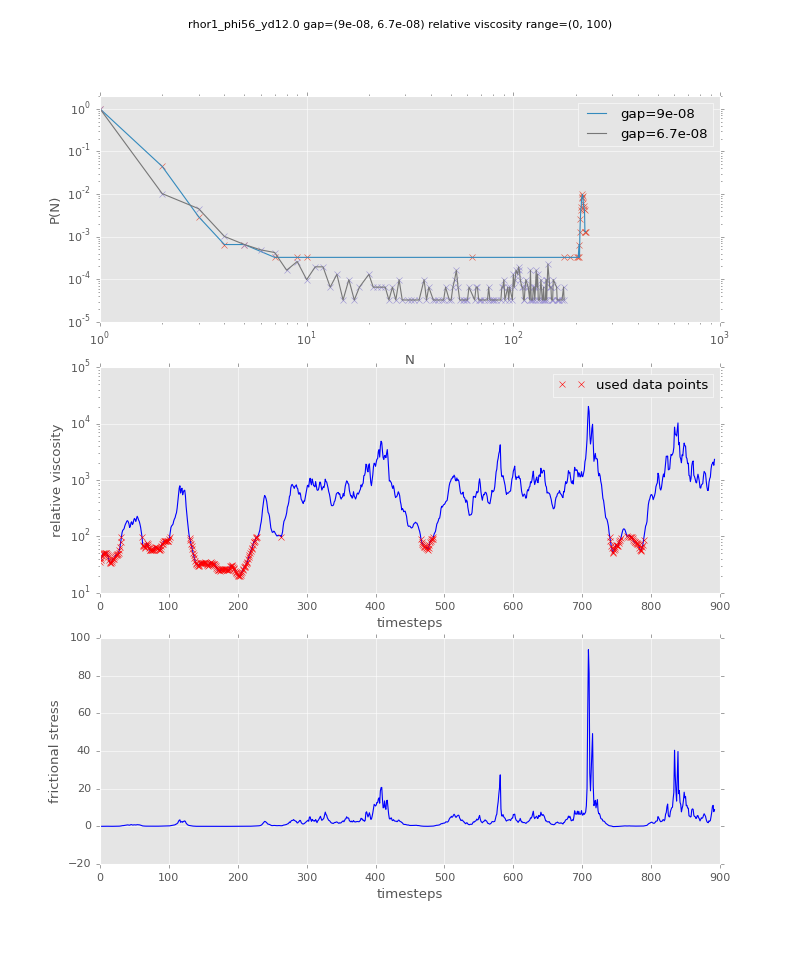

[   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
   13.   14.   15.   16.   17.   18.   20.   21.   22.   23.   24.   25.
   26.   27.   28.   29.   31.   32.   33.   35.   37.   38.   39.   41.
   42.   43.   45.   46.   47.   49.   50.   51.   52.   53.   54.   55.
   57.   58.   59.   60.   61.   65.   66.   67.   68.   69.   70.   72.
   75.   76.   77.   79.   80.   81.   82.   87.   88.   89.   90.   91.
   94.   95.   96.   99.  100.  101.  102.  103.  105.  106.  107.  108.
  110.  111.  112.  113.  114.  115.  118.  120.  121.  122.  123.  124.
  125.  126.  127.  128.  129.  130.  131.  132.  134.  136.  138.  139.
  140.  141.  142.  143.  144.  145.  146.  147.  150.  151.  152.  153.
  154.  155.  156.  162.  163.  164.  165.  166.  172.  175.  176.] [  3.06350000e+04   3.13000000e+02   1.39000000e+02   3.10000000e+01
   2.00000000e+01   1.50000000e+01   1.30000000e+01   5.00000000e+00
   8.00000000e+00   3.00000000e+00   6.00000000e+00   6.00000000

In [28]:
label1 = widgets.Label("")
label_cache = widgets.Label(value = "")
progress_1 = widgets.IntProgress(min = 0, max = 100, value = 0)

def cluster_size_vs_cluster_probability_matplotlib(path_text_input,phi,shearrate,time,plot_for_all_data,gaps,alpha,viscosity_limits):
    if len(path_text_input.strip())== 0:
        path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    else:
        path = str(path_text_input)
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    print len(dataset.tlist), "steps available"

    cache_file = cache(cachefile=dataset.cachefile)
    
    viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
    friction_file = pd.read_csv(path+"/result/part_stress_fric_t.dat")
    viscosity = np.array(viscosity_file[viscosity_file.columns[4]][1:])
    friction = np.array(friction_file[friction_file.columns[2]][1:])
    viscosity_limits_idx = np.where((viscosity<viscosity_limits[1]) & (viscosity>viscosity_limits[0]))[0]
    time = viscosity_limits_idx 
    if plot_for_all_data : 
        time = np.asarray(range(1,len(dataset.tlist[1:])))
        viscosity_text = " for all timesteps"
    else:
        viscosity_text = " relative viscosity range="+ str(viscosity_limits)
#     print time
    plt.style.use("ggplot")
    plt.figure(figsize=[10,12])
    for gap in gaps:
        s_data = np.asarray([])
        ns_data = np.asarray([])
        for i,t in enumerate([dataset.tlist[i] for i in time]):
            progress_1.value = int(float(i)/len(time)*100)
            try:
                if cache_file.has_data(t,"cluster_size_distribution_gap_"+str(gap)):
                    label_cache.value = "loading data for t="+str(t)
                    s, ns = cache_file.load_data(t,"cluster_size_distribution_gap_"+str(gap))
                    idx = np.where(ns != 0)[0]
                    s_data = np.concatenate([s_data , s[idx]])
                    ns_data = np.concatenate([ns_data , ns[idx]])
                    label1.value = str(s[idx])
                else:
                    dataset.load_state(t)
                    s, ns = dataset.get_quantity("cluster_size_distribution", gap = gap, update=True)
                    cache_file.save_data(t,{"cluster_size_distribution_gap_"+str(gap):[s, ns]})
                    idx = np.where(ns != 0)[0]
                    s_data = np.concatenate([s_data , s[idx]])
                    ns_data = np.concatenate([ns_data , ns[idx]])
                    label1.value = str(s[idx])
            except Exception as e:
                print e
        uniq_sizes = np.unique(s_data)
        ns_data_cumulative = np.zeros_like(uniq_sizes)
        for i, item in enumerate(uniq_sizes):
            idx_uniq = np.where(s_data == item)[0]
            ns_data_cumulative[i] = sum(ns_data[idx_uniq])
            
        x,y = uniq_sizes, ns_data_cumulative
    #     x_new = np.linspace(x[0], x[-1], num=len(x)*10)
    #     import numpy.polynomial.polynomial as poly
    #     coefs = poly.polyfit(x, y, 20)
    #     ffit = poly.polyval(x_new, coefs)
        def zipfs(k,s,N):
            denom = sum([1.0/i**s for i in range(1,int(N+1))])
            num = 1.0/k**s
            return num/denom

        
        plt.subplot(3,1,1)
        plt.loglog(x,  y/float(max(y)),'x')
        plt.loglog(x,  y/float(max(y)), linewidth=1.0,label="gap="+str(gap))
        #uncomment to enable zipf's law visualization
    #     plt.loglog(range(1,int(max(x))),  [zipfs(i,alpha,max(x)) for i in range(1,int(max(x)))],label= "zipfs law")
    #     plt.plot(x_new, ffit, 'r')
        plt.legend(loc="best")
        plt.xlim([0,1e3])
        plt.ylim([1e-5,2])
        plt.xlabel("N")
        plt.ylabel("P(N)")
        plt.suptitle(path+" gap="+str(gaps)+viscosity_text)
    
    plt.subplot(3,1,2)
    plt.plot(range(len(viscosity)), viscosity, 'b')
    if not plot_for_all_data:
        plt.plot(viscosity_limits_idx, viscosity[viscosity_limits_idx],'rx', label="used data points")
    else:
        plt.plot(range(len(viscosity)), viscosity,'rx', label="used data points")
    plt.legend(loc="best")
    plt.xlabel("timesteps")
    plt.ylabel("relative viscosity")
    plt.yscale("log")
    
    plt.subplot(3,1,3)
    plt.plot(range(len(friction)), friction, 'b')
    plt.legend(loc="best")
    plt.xlabel("timesteps")
    plt.ylabel("frictional stress")
    plt.yscale("linear")
    
    print uniq_sizes, ns_data_cumulative
    
widget_cluster_size_vs_cluster_probability_matplotlib = interactive(cluster_size_vs_cluster_probability_matplotlib, \
    path_text_input = widgets.Text(value=""),\
    phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
    shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000], value = 12),\
    time = widgets.IntRangeSlider(value = [1,1000] ,min = 1, max =1000 ),\
    plot_for_all_data = widgets.ToggleButtons(options = [True,False], value=False),\
    gaps = widgets.SelectMultiple(options=[9e-8,6.7e-8,4e-8,1e-8], value = [9e-8,6.7e-8]),\
    alpha = widgets.FloatText(value = 2.5),\
    viscosity_limits = widgets.IntRangeSlider(value=[0,100], min = 0, max = 1000000),\
    __manual = True)
display(widget_cluster_size_vs_cluster_probability_matplotlib)
display(label1)
display(progress_1)
display(label_cache)
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(widget_cluster_size_distribution_matplotlib)
# display(widgets.HBox(cluster_size_distribution.children[4:]))

In [27]:
label1 = widgets.Label("")
label_cache = widgets.Label(value = "")
progress1 = widgets.IntProgress(min = 0, max = 100, value = 0)

def cluster_size_vs_cluster_probability_all_matplotlib(phi,shearrates,gap,alpha):
    s_data = np.asarray([])
    ns_data = np.asarray([])
    for shearrate in shearrates:
        try:
            path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
            dataset = sp.reader.DataSet(path,particles=True, fluid=True)
            print path
            cache_file = cache(cachefile=dataset.cachefile)
            for i,t in enumerate(dataset.tlist[1:]):
                progress1.value = int(float(i)/len(dataset.tlist[1:])*100)
                try:
                    if cache_file.has_data(t,"cluster_size_distribution_gap_"+str(gap)):
                        label_cache.value = "loading data for t="+str(t)
                        s, ns = cache_file.load_data(t,"cluster_size_distribution_gap_"+str(gap))
                        idx = np.where(ns != 0)[0]
                        s_data = np.concatenate([s_data , s[idx]])
                        ns_data = np.concatenate([ns_data , ns[idx]])
                        label1.value = path+" "+str(s[idx])
                    else:
                        dataset.load_state(t)
                        label_cache.value = "creating and saving data for t="+str(t)
                        s, ns = dataset.get_quantity("cluster_size_distribution", gap = gap, update=True)
                        cache_file.save_data(t,{"cluster_size_distribution_gap_"+str(gap):[s, ns]})
                        idx = np.where(ns != 0)[0]
                        s_data = np.concatenate([s_data , s[idx]])
                        ns_data = np.concatenate([ns_data , ns[idx]])
                        label1.value = str(s[idx])
                except Exception as e:
                    print e
        except Exception as e:
            print e
    
    uniq_sizes = np.unique(s_data)
    ns_data_cumulative = np.zeros_like(uniq_sizes)
    for i, item in enumerate(uniq_sizes):
        idx_uniq = np.where(s_data == item)[0]
        ns_data_cumulative[i] = sum(ns_data[idx_uniq])

    x,y = uniq_sizes, ns_data_cumulative
#     x_new = np.linspace(x[0], x[-1], num=len(x)*10)
#     import numpy.polynomial.polynomial as poly
#     coefs = poly.polyfit(x, y, 20)
#     ffit = poly.polyval(x_new, coefs)
#     def zipfs(k,s,N):
#         denom = sum([1.0/i**s for i in range(1,int(N+1))])
#         num = 1.0/k**s
#         return num/denom


#     plt.subplot(3,1,1)
    plt.style.use("ggplot")
    plt.figure()
    plt.loglog(x,  y/float(max(y)),'x')
    plt.loglog(x,  y/float(max(y)), linewidth=1.0,label="gap="+str(gap))
    #uncomment to enable zipf's law visualization
#     plt.loglog(range(1,int(max(x))),  [zipfs(i,alpha,max(x)) for i in range(1,int(max(x)))],label= "zipfs law")
#     plt.plot(x_new, ffit, 'r')
    plt.legend(loc="best")
    plt.xlim([0,1e3])
    plt.ylim([1e-6,2])
    plt.xlabel("N")
    plt.ylabel("P(N)")
    name = "phi"+str(phi)+"_yd_"
    for j in shearrates: name += str(j).replace('.','_')+"_"
    plt.suptitle(name+"_gap="+str(gap))
#     plt.savefig(name+str(gap))
#     plt.suptitle(path+" gap="+str(gap))
    print uniq_sizes, ns_data_cumulative
    
widget_cluster_size_vs_cluster_probability_all_matplotlib = interactive(cluster_size_vs_cluster_probability_all_matplotlib, \
    phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
    shearrates= widgets.SelectMultiple(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000]),\
    time = widgets.IntRangeSlider(value = [1,1000] ,min = 1, max =1000 ),\
    plot_for_all_data = widgets.ToggleButtons(options = [True,False], value=False),\
    gap = widgets.RadioButtons(options=[9e-8,6.7e-8,4e-8,1e-8], value = 9e-8),\
    alpha = widgets.FloatText(value = 2.5),\
    viscosity_limits = widgets.IntRangeSlider(value=[0,100], min = 0, max = 1000000),\
    __manual = True)
display(widget_cluster_size_vs_cluster_probability_all_matplotlib)
display(label1)
display(progress1)
display(label_cache)
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(widget_cluster_size_distribution_matplotlib)
# display(widgets.HBox(cluster_size_distribution.children[4:]))

325 steps available


<IPython.core.display.Javascript object>


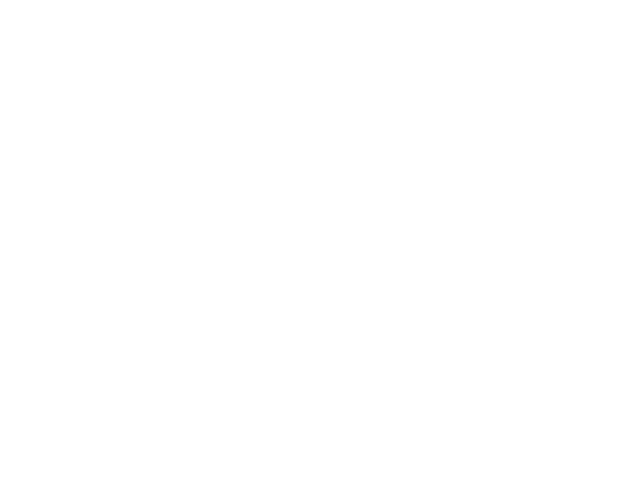

ValueError: max() arg is an empty sequence

In [48]:
label1 = widgets.Label("")
label_cache = widgets.Label(value = "")
progress_1 = widgets.IntProgress(min = 0, max = 100, value = 0)

def cluster_size_vs_viscosity_matplotlib(path_text_input,phi,shearrate,gaps):
    if len(path_text_input.strip())== 0:
        path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    else:
        path = str(path_text_input)
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    print len(dataset.tlist), "steps available"

    cache_file = cache(cachefile=dataset.cachefile)
    viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
    viscosity = np.array(viscosity_file[viscosity_file.columns[4]][1:])
    
    plt.style.use("ggplot")
    plt.figure()
    for gap in gaps:
        s_data = np.asarray([])
        ns_data = np.asarray([])
        viscosity_temp = np.asarray([])
        N_typical = np.asarray([])
        for i,t in enumerate(dataset.tlist[1:len(viscosity)]):
            progress_1.value = int(float(i)/len(dataset.tlist[1:len(viscosity)])*100)
            try:
                if cache_file.has_data(t,"cluster_size_distribution_gap_"+str(gap)):
                    label_cache.value = "loading data for t="+str(t)
                    s, ns = cache_file.load_data(t,"cluster_size_distribution_gap_"+str(gap))
                    idx = np.where(ns != 0)[0]
                    s_data = np.concatenate([s_data , s[idx]])
                    ns_data = np.concatenate([ns_data , ns[idx]])
                    N_typical_temp = np.asarray([sum(np.multiply(s,ns))/float(sum(ns))])
                    N_typical = np.concatenate([N_typical, N_typical_temp]) 
                    viscosity_temp = np.concatenate([viscosity_temp, [viscosity[i]]])
                    label1.value = str(s[idx])
                else:
                    dataset.load_state(t)
                    s, ns = dataset.get_quantity("cluster_size_distribution", gap = gap, update=True)
                    cache_file.save_data(t,{"cluster_size_distribution_gap_"+str(gap):[s, ns]})
                    idx = np.where(ns != 0)[0]
                    s_data = np.concatenate([s_data , s[idx]])
                    ns_data = np.concatenate([ns_data , ns[idx]])
                    label1.value = str(s[idx])
            except Exception as e:
                print e
#         uniq_sizes = np.unique(s_data)
#         ns_data_cumulative = np.zeros_like(uniq_sizes)
#         for i, item in enumerate(uniq_sizes):
#             idx_uniq = np.where(s_data == item)[0]
#             ns_data_cumulative[i] = sum(ns_data[idx_uniq])
            
#         x,y = uniq_sizes, ns_data_cumulative
        x,y = N_typical, viscosity_temp
        plt.plot(x,  y/float(max(y)),'.',label="gap="+str(gap))
        
#         plt.loglog(x,  y/float(max(y)), linewidth=1.0,label="gap="+str(gap))
        plt.legend(loc="best")
#         plt.xlim([0,1e3])
#         plt.ylim([1e-5,2])
        plt.xlabel("N_typical")
        plt.ylabel("relative viscosity")
        plt.suptitle("cluster size vs rel. viscosity for "+path+" gap="+str(gaps))
    
    
widget_cluster_size_vs_viscosity_matplotlib = interactive(cluster_size_vs_viscosity_matplotlib, \
    path_text_input = widgets.Text(value=""),\
    phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
    shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000], value = 12),\
    gaps = widgets.SelectMultiple(options=[9e-8,6.7e-8,4e-8,1e-8], value = [9e-8,6.7e-8,4e-8,1e-8]),\
    __manual = True)
display(widget_cluster_size_vs_viscosity_matplotlib)
display(label1)
display(progress_1)
display(label_cache)
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(widget_cluster_size_distribution_matplotlib)
# display(widgets.HBox(cluster_size_distribution.children[4:]))